In [34]:
import sys 
sys.path.insert(-1,"../")
from mazeAgentUtils import *

%load_ext autoreload
%autoreload 2

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
N=50
xcen = np.linspace(0,5,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T

#Default parameters for MazeAgent 
params = { 

          #Maze params 
          'mazeType'            : 'loop',                #type of maze, define in getMaze() function
          'stateType'           : 'gaussianThreshold',   #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : 5,                     #maze size scaling parameter, metres
          'dt'                  : 0.002,                 #simulation time disretisation 
          'dx'                  : 0.01,
          'centres'             : centres,               #array of receptive field positions. Overwrites nCells
          'sigma'               : 1,                     #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : False,                 #whether doors are opened or closed in multicompartment maze
         
          'kappa'               : 1,
          'tau'                 : 4,
          'tau_STDP'            : 20e-3,
          'precessFraction'     : 0.6, 
          'peakFiringRate'      : 5,  
          'a_STDP_asymm'        : -0.4,
          'tau_STDP_asymm'      : 2
          }


agent =  MazeAgent(params)

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces
DONE


'../figures/211007/openloop_1553'

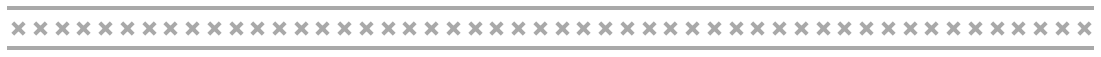

In [9]:
#FIGURE 2A
plotter = Visualiser(agent)
fig, ax = plotter.plotFeatureCells(centresOnly=True, textlabel=False,onepink=True)
saveFigure(fig,'openloop',specialLocation="../figures/paperFigures/figure2/2A.svg")


  0%|          | 0/900000 [00:00<?, ?it/s]

Calculating place and grid cells


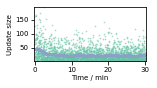

In [10]:
agent.runRat(trainTime=30,saveEvery=0.5)
plotter = Visualiser(agent)

'../figures/211007/Mvarerr_1603'

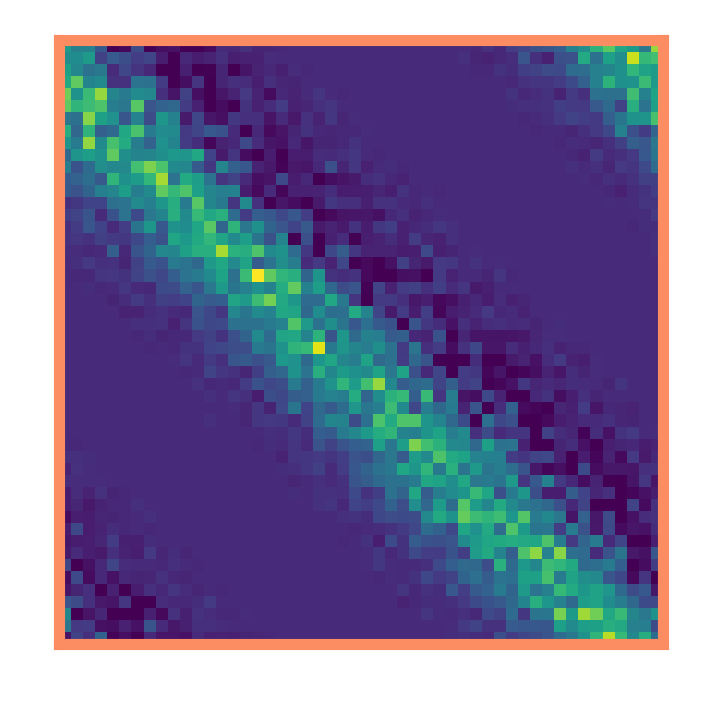

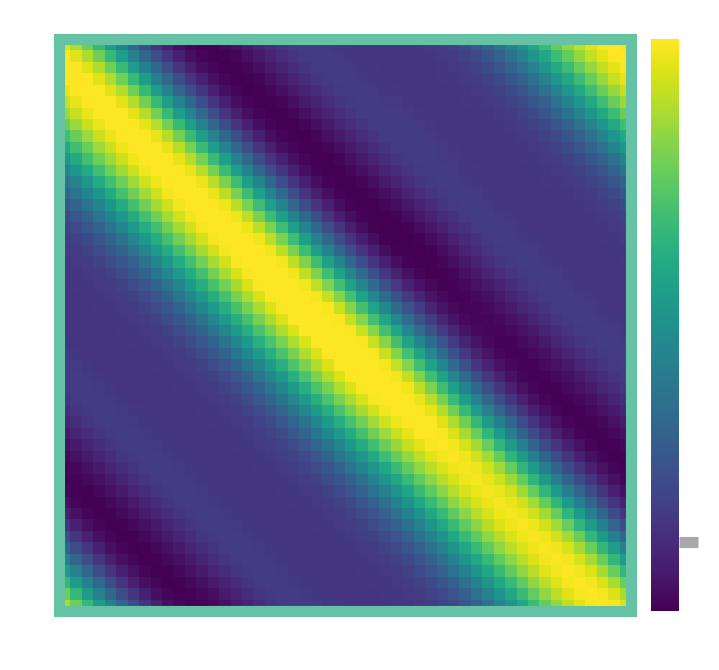

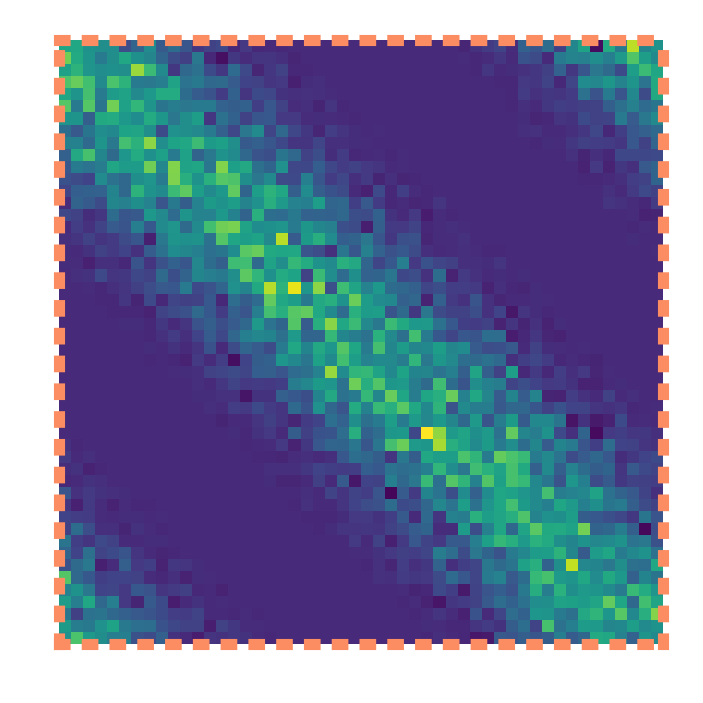

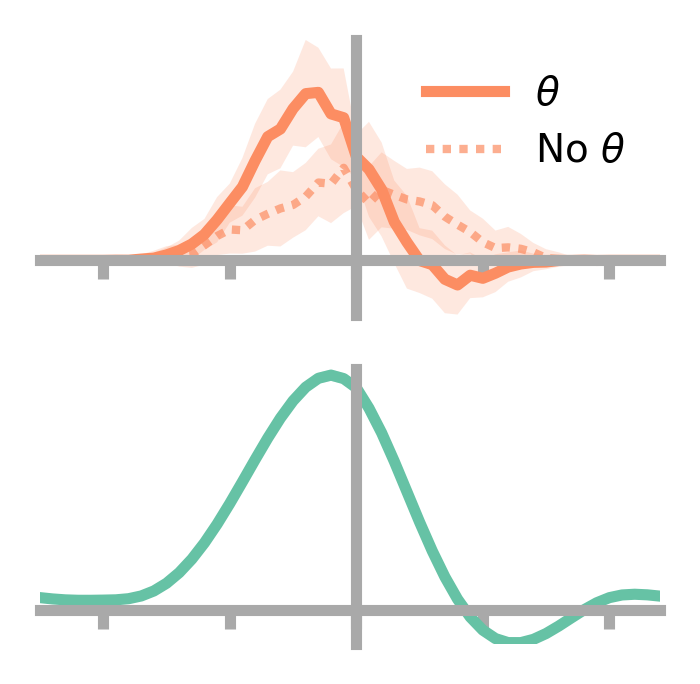

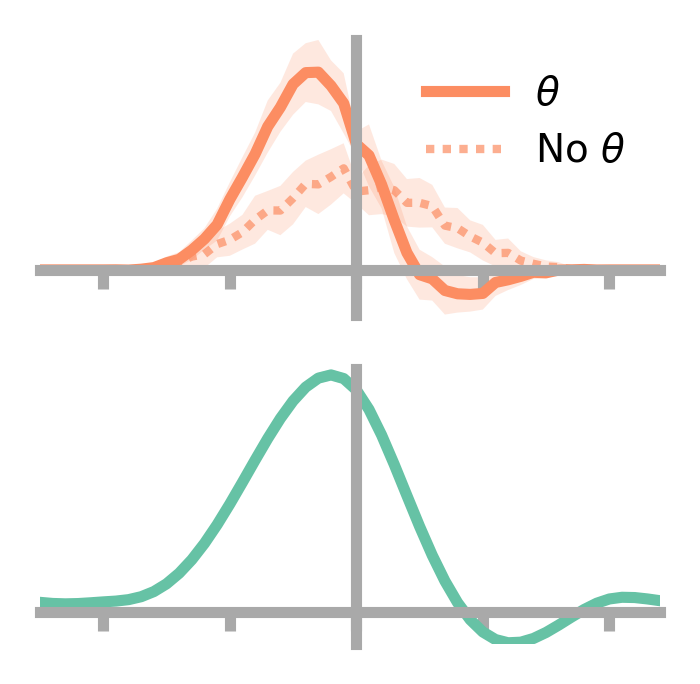

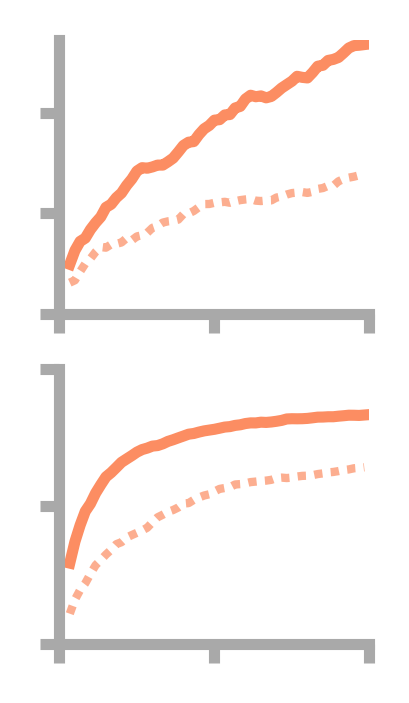

In [12]:
# #FIGURE 2B
fig, ax = plotter.plotM(whichM='W',colorbar=False,time=10)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure2/2B.svg')

#FIGURE 2C
fig, ax, cb, cax = plotter.plotM(whichM='M')
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C0')
    spine.set_linewidth(2)
cb.set_ticks([0])
cb.set_ticklabels([""])
cax.tick_params(color='darkgrey',width=2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'M',specialLocation='../figures/paperFigures/figure2/2C.svg')

#FIGURE 2C
fig, ax = plotter.plotM(whichM='W_notheta',colorbar=False,time=10)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
    spine.set_linestyle((0,(0.5,2)))
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W_notheta')


#FIGURE 2D
fig, ax = plotter.plotMAveraged(time=10)
saveFigure(fig,'Mav',specialLocation='../figures/paperFigures/figure2/2D.svg')

fig, ax = plotter.plotMAveraged(time=30)
saveFigure(fig,'Mav',specialLocation='../figures/paperFigures/figure2/2D.svg')


#FIGURE 2E
fig, ax = plotter.plotVarianceAndError()
saveFigure(fig,'Mvarerr',specialLocation='../figures/paperFigures/figure2/2E.svg')



In [13]:
N=50
xcen = np.linspace(0,5,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T

# centres = np.array([[2.5,0.1],[2.6,0.1]])

#Default parameters for MazeAgent 
params2 = { 

          #Maze params 
          'mazeType'            : 'loop',                #type of maze, define in getMaze() function
          'stateType'           : 'gaussianThreshold',   #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : 5,                     #maze size scaling parameter, metres
          'dt'                  : 0.002,                 #simulation time disretisation 
          'dx'                  : 0.01,
          'centres'             : centres,               #array of receptive field positions. Overwrites nCells
          'sigma'               : 1,                     #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : True,                 #whether doors are opened or closed in multicompartment maze
         
          'kappa'               : 1,
          'tau'                 : 4,
          'tau_STDP'            : 20e-3,
          'precessFraction'     : 0.6, 
          'peakFiringRate'      : 5,  
          'a_STDP_asymm'        : -0.4,
          'tau_STDP_asymm'      : 2
          }



agent2 =  MazeAgent(params2)

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces
DONE


'../figures/211007/openloop_1619'

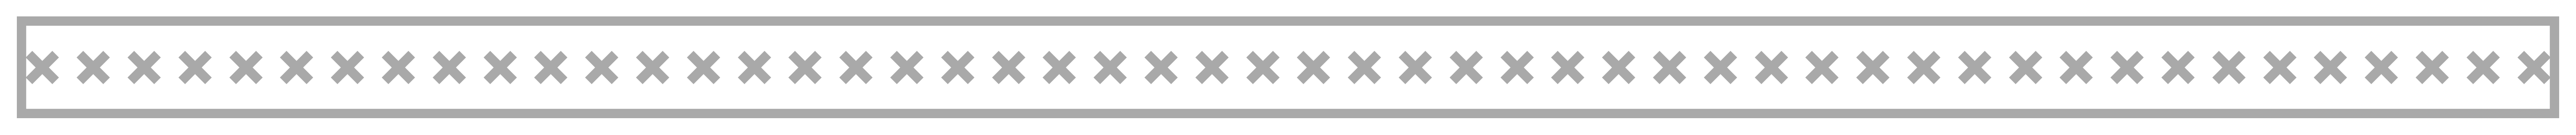

In [17]:
#FIGURE 2F
plotter2 = Visualiser(agent2)
fig, ax = plotter2.plotFeatureCells(centresOnly=True, textlabel=False,onepink=False)
saveFigure(fig,'openloop',specialLocation="../figures/paperFigures/figure2/2F.svg")


  0%|          | 0/900000 [00:00<?, ?it/s]

Calculating place and grid cells


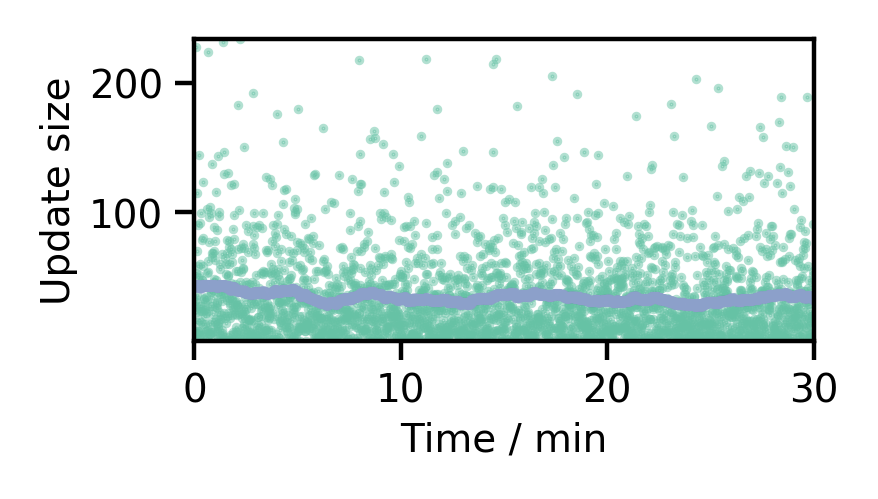

In [15]:
agent2.runRat(trainTime=30,saveEvery=0.5)
plotter2 = Visualiser(agent2)

'../figures/211007/Mvarerr_1620'

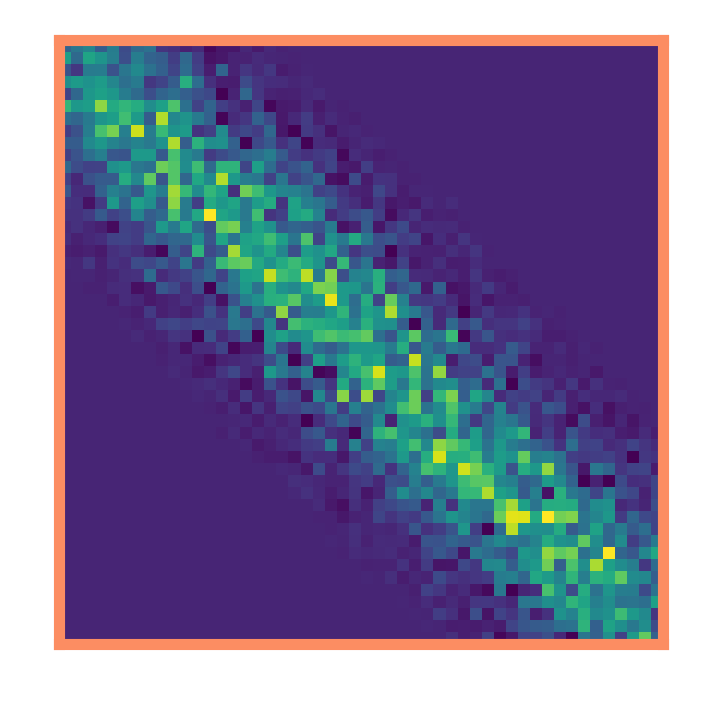

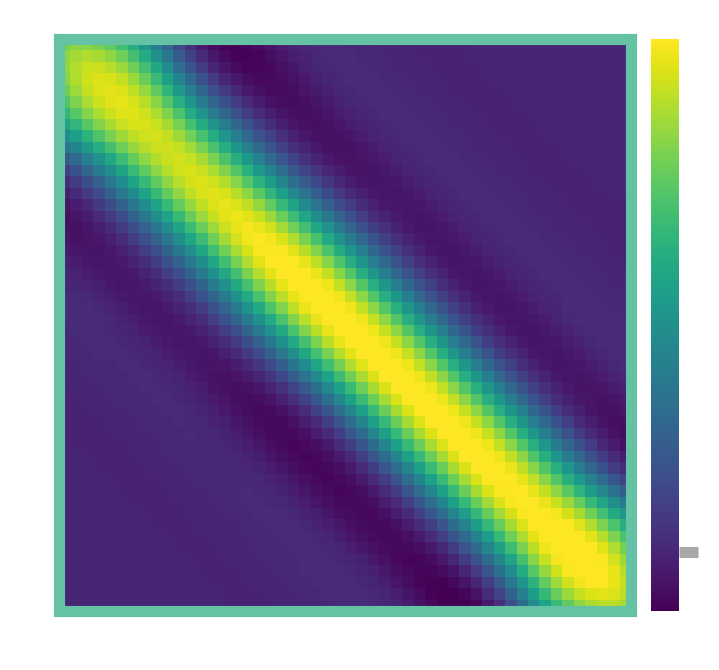

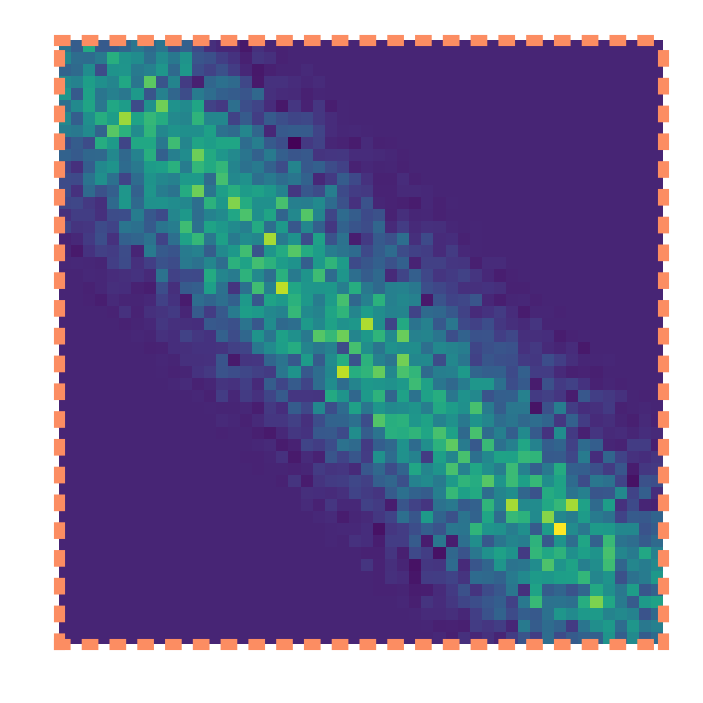

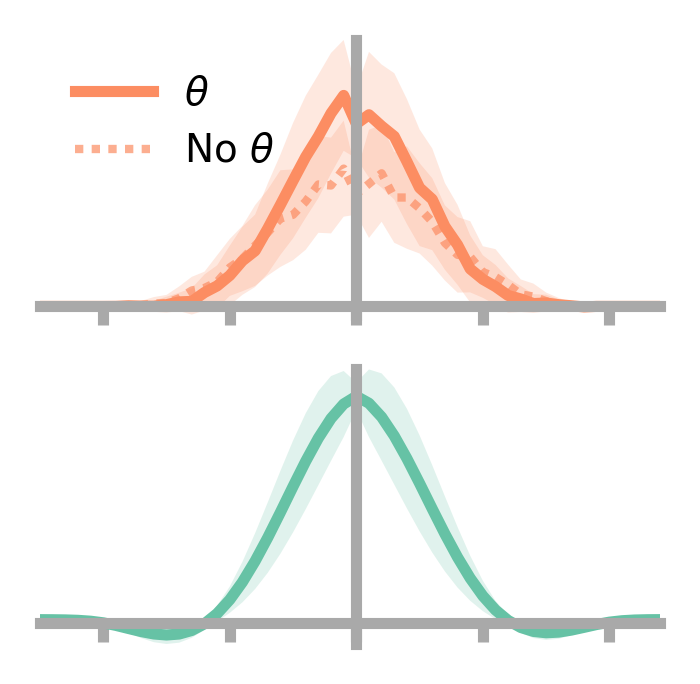

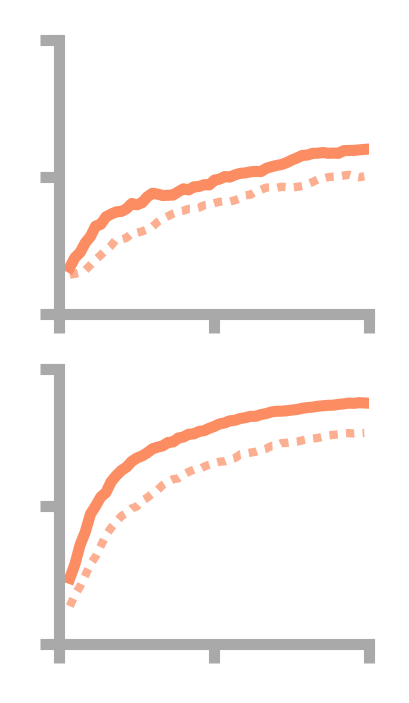

In [18]:
#FIGURE 2G
fig, ax = plotter2.plotM(whichM='W',colorbar=False,time=10)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure2/2G.svg')

#FIGURE 2H
fig, ax, cb, cax = plotter2.plotM()
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C0')
    spine.set_linewidth(2)
cb.set_ticks([0])
cb.set_ticklabels([""])
cax.tick_params(color='darkgrey',width=2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'M',specialLocation='../figures/paperFigures/figure2/2H.svg')

fig, ax = plotter2.plotM(whichM='W_notheta',colorbar=False)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
    spine.set_linestyle((0,(0.5,2)))
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W_notheta')


#FIGURE 2IJ
fig, ax = plotter2.plotMAveraged()
saveFigure(fig,'Mav',specialLocation='../figures/paperFigures/figure2/2I.svg')

fig, ax = plotter2.plotVarianceAndError()
saveFigure(fig,'Mvarerr',specialLocation='../figures/paperFigures/figure2/2J.svg')


In [22]:
#Default parameters for MazeAgent 
N = 200 
roomSize = 2.5
n = int(np.sqrt(N / 2))
delta = roomSize / n
x = np.arange(0,2.5,delta) + delta/2
y = np.arange(0,2.5,delta) + delta/2
xy = np.meshgrid(x,y)
centresL = []
for i in range(len(x)):
    for j in range(len(y)):
        centresL += [[x[i],y[j]]]
centresL = np.array(centresL)
centresR = centresL + np.array([2.5,0])
centres = np.vstack([centresL,centresR])
delta=0.45*delta
centres += np.random.uniform(-0.8*delta,0.8*delta,size=centres.shape)

params3 = { 

          #Maze params 
          'mazeType'            : 'twoRooms',                #type of maze, define in getMaze() function
          'stateType'           : 'gaussianThreshold',   #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'raudies',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : roomSize,                     #maze size scaling parameter, metres
          'dt'                  : 0.002,                 #simulation time disretisation 
          'dx'                  : 0.02,
          'centres'             : centres,               #array of receptive field positions. Overwrites nCells
          'sigma'               : 1,                     #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : False,                 #whether doors are opened or closed in multicompartment maze
          'firingRateLookUp'    : True,
          'rotSpeedScale'       : 1.5,
          'biasDoorCross'       : True,

          'kappa'               : 1,
          'tau'                 : 4,
          'tau_STDP'            : 20e-3,
          'precessFraction'     : 0.6, 
          'peakFiringRate'      : 5,  
          'a_STDP_asymm'        : -0.4,
          'tau_STDP_asymm'      : 2
          }

agent3 =  MazeAgent(params3)


Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/31250 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces
DONE


  0%|          | 0/1800000 [00:00<?, ?it/s]

crossed 69.30800000001987
crossed 100.50799999994716
crossed 116.82199999990914
crossed 162.57200000004815
crossed 203.51400000024364
crossed 216.76800000030693
time
Keyboard Interrupt:
Calculating place and grid cells


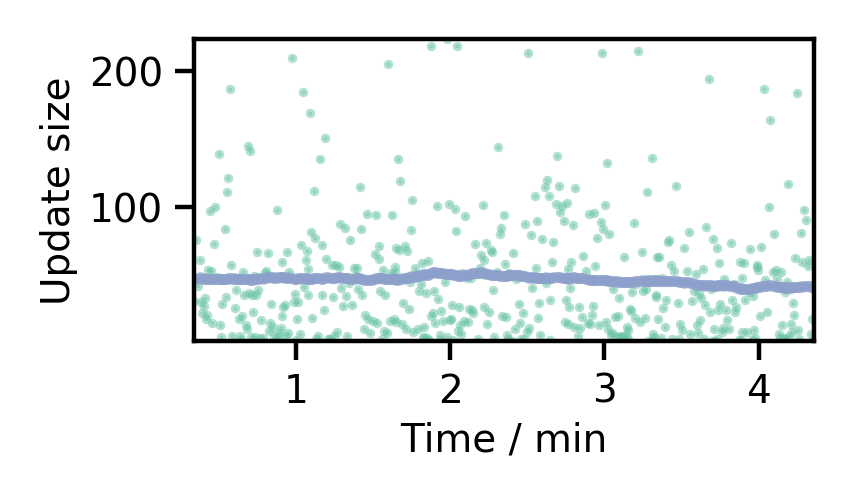

In [25]:
agent3.runRat(trainTime=60)
plotter3 = Visualiser(agent3)


0.3414783677559828


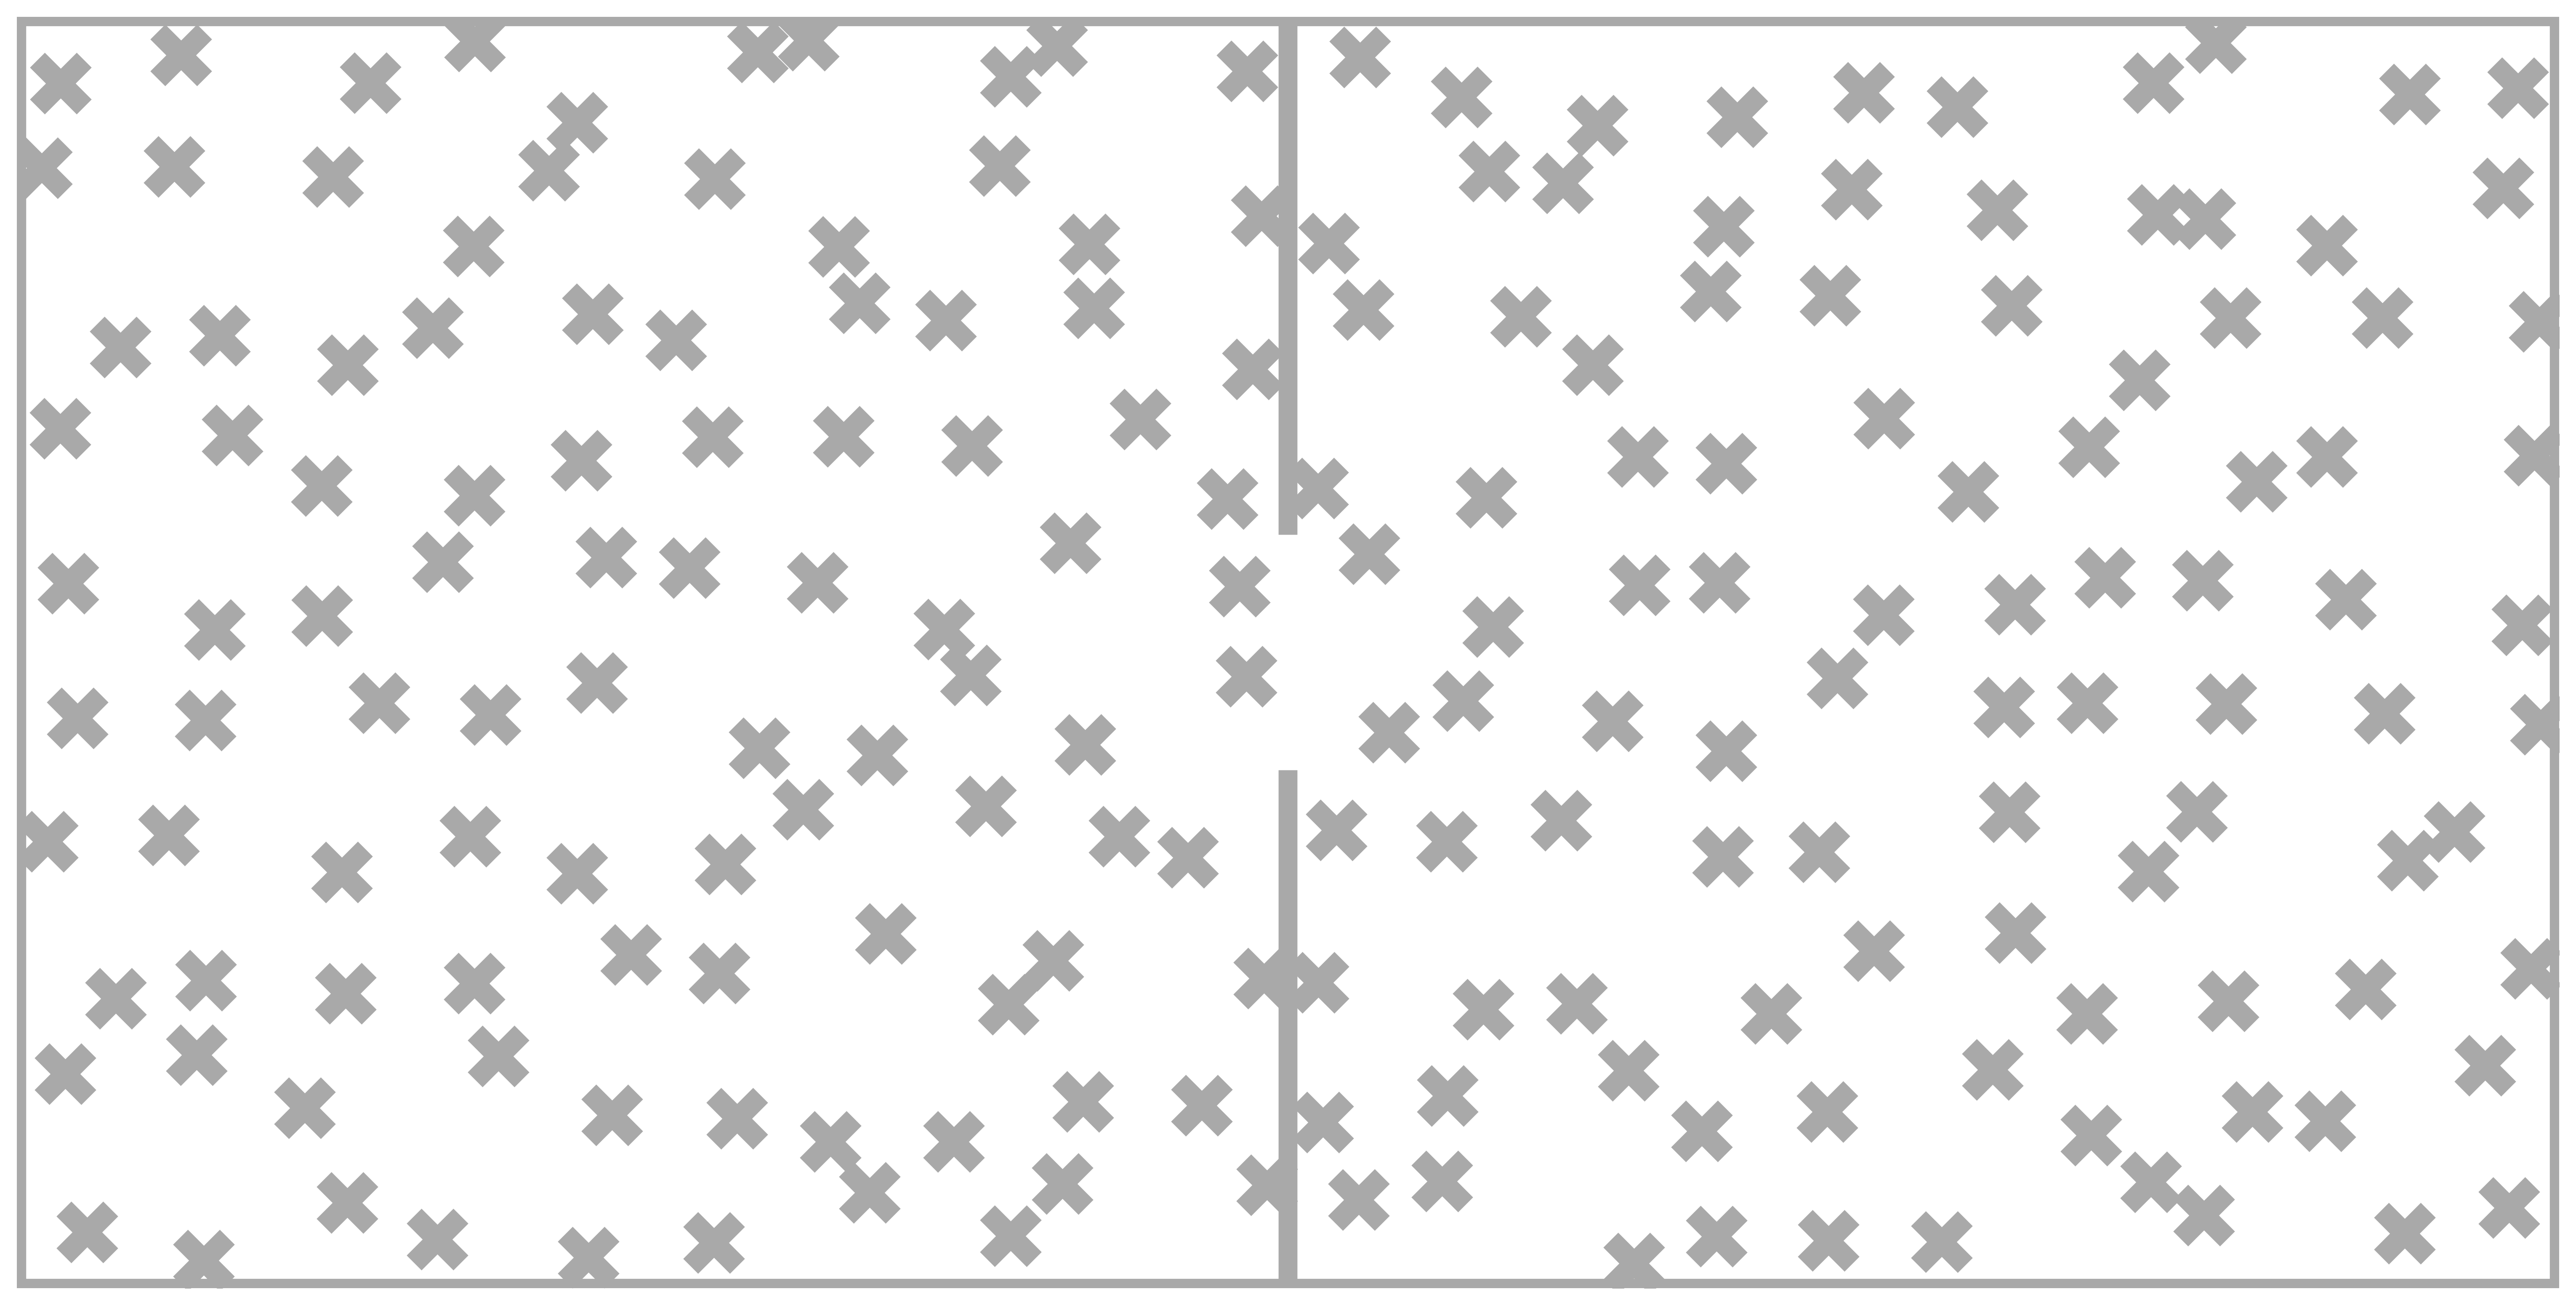

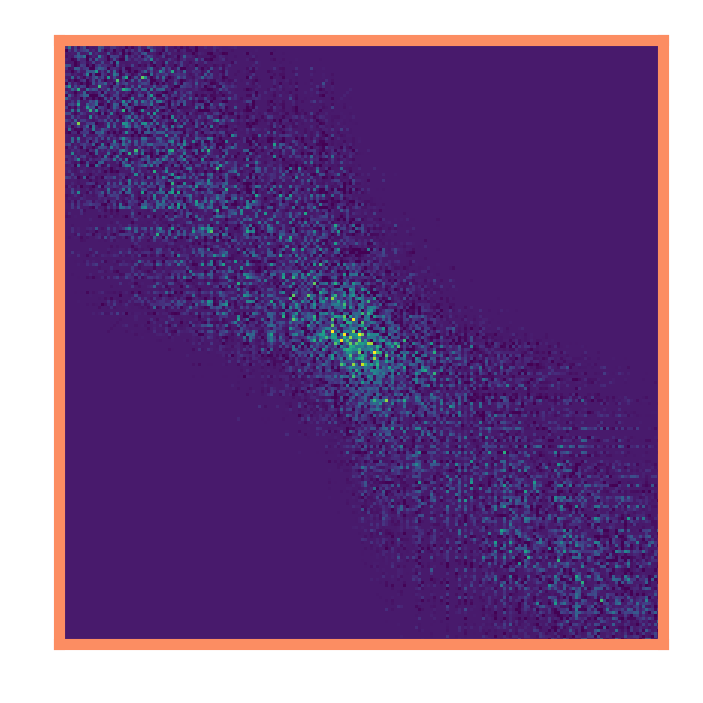

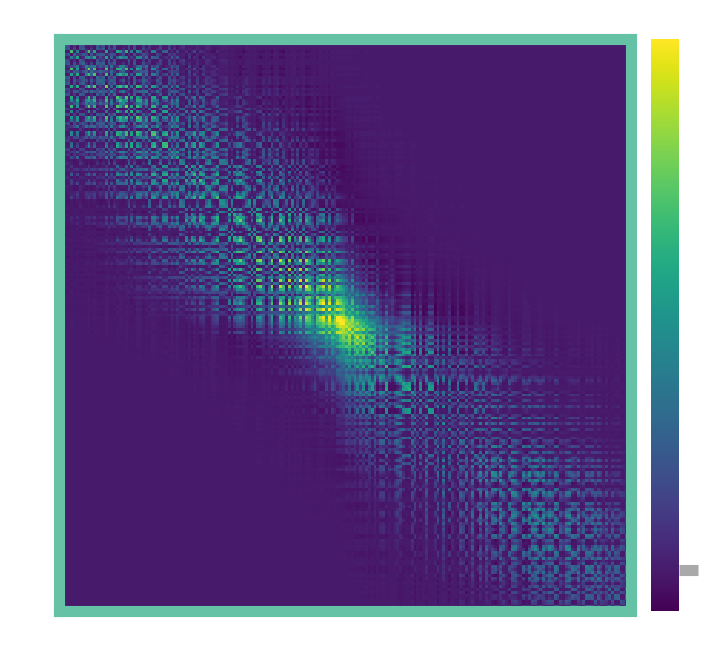

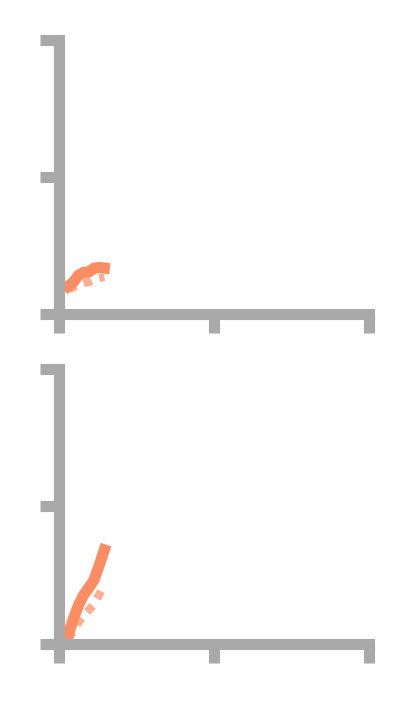

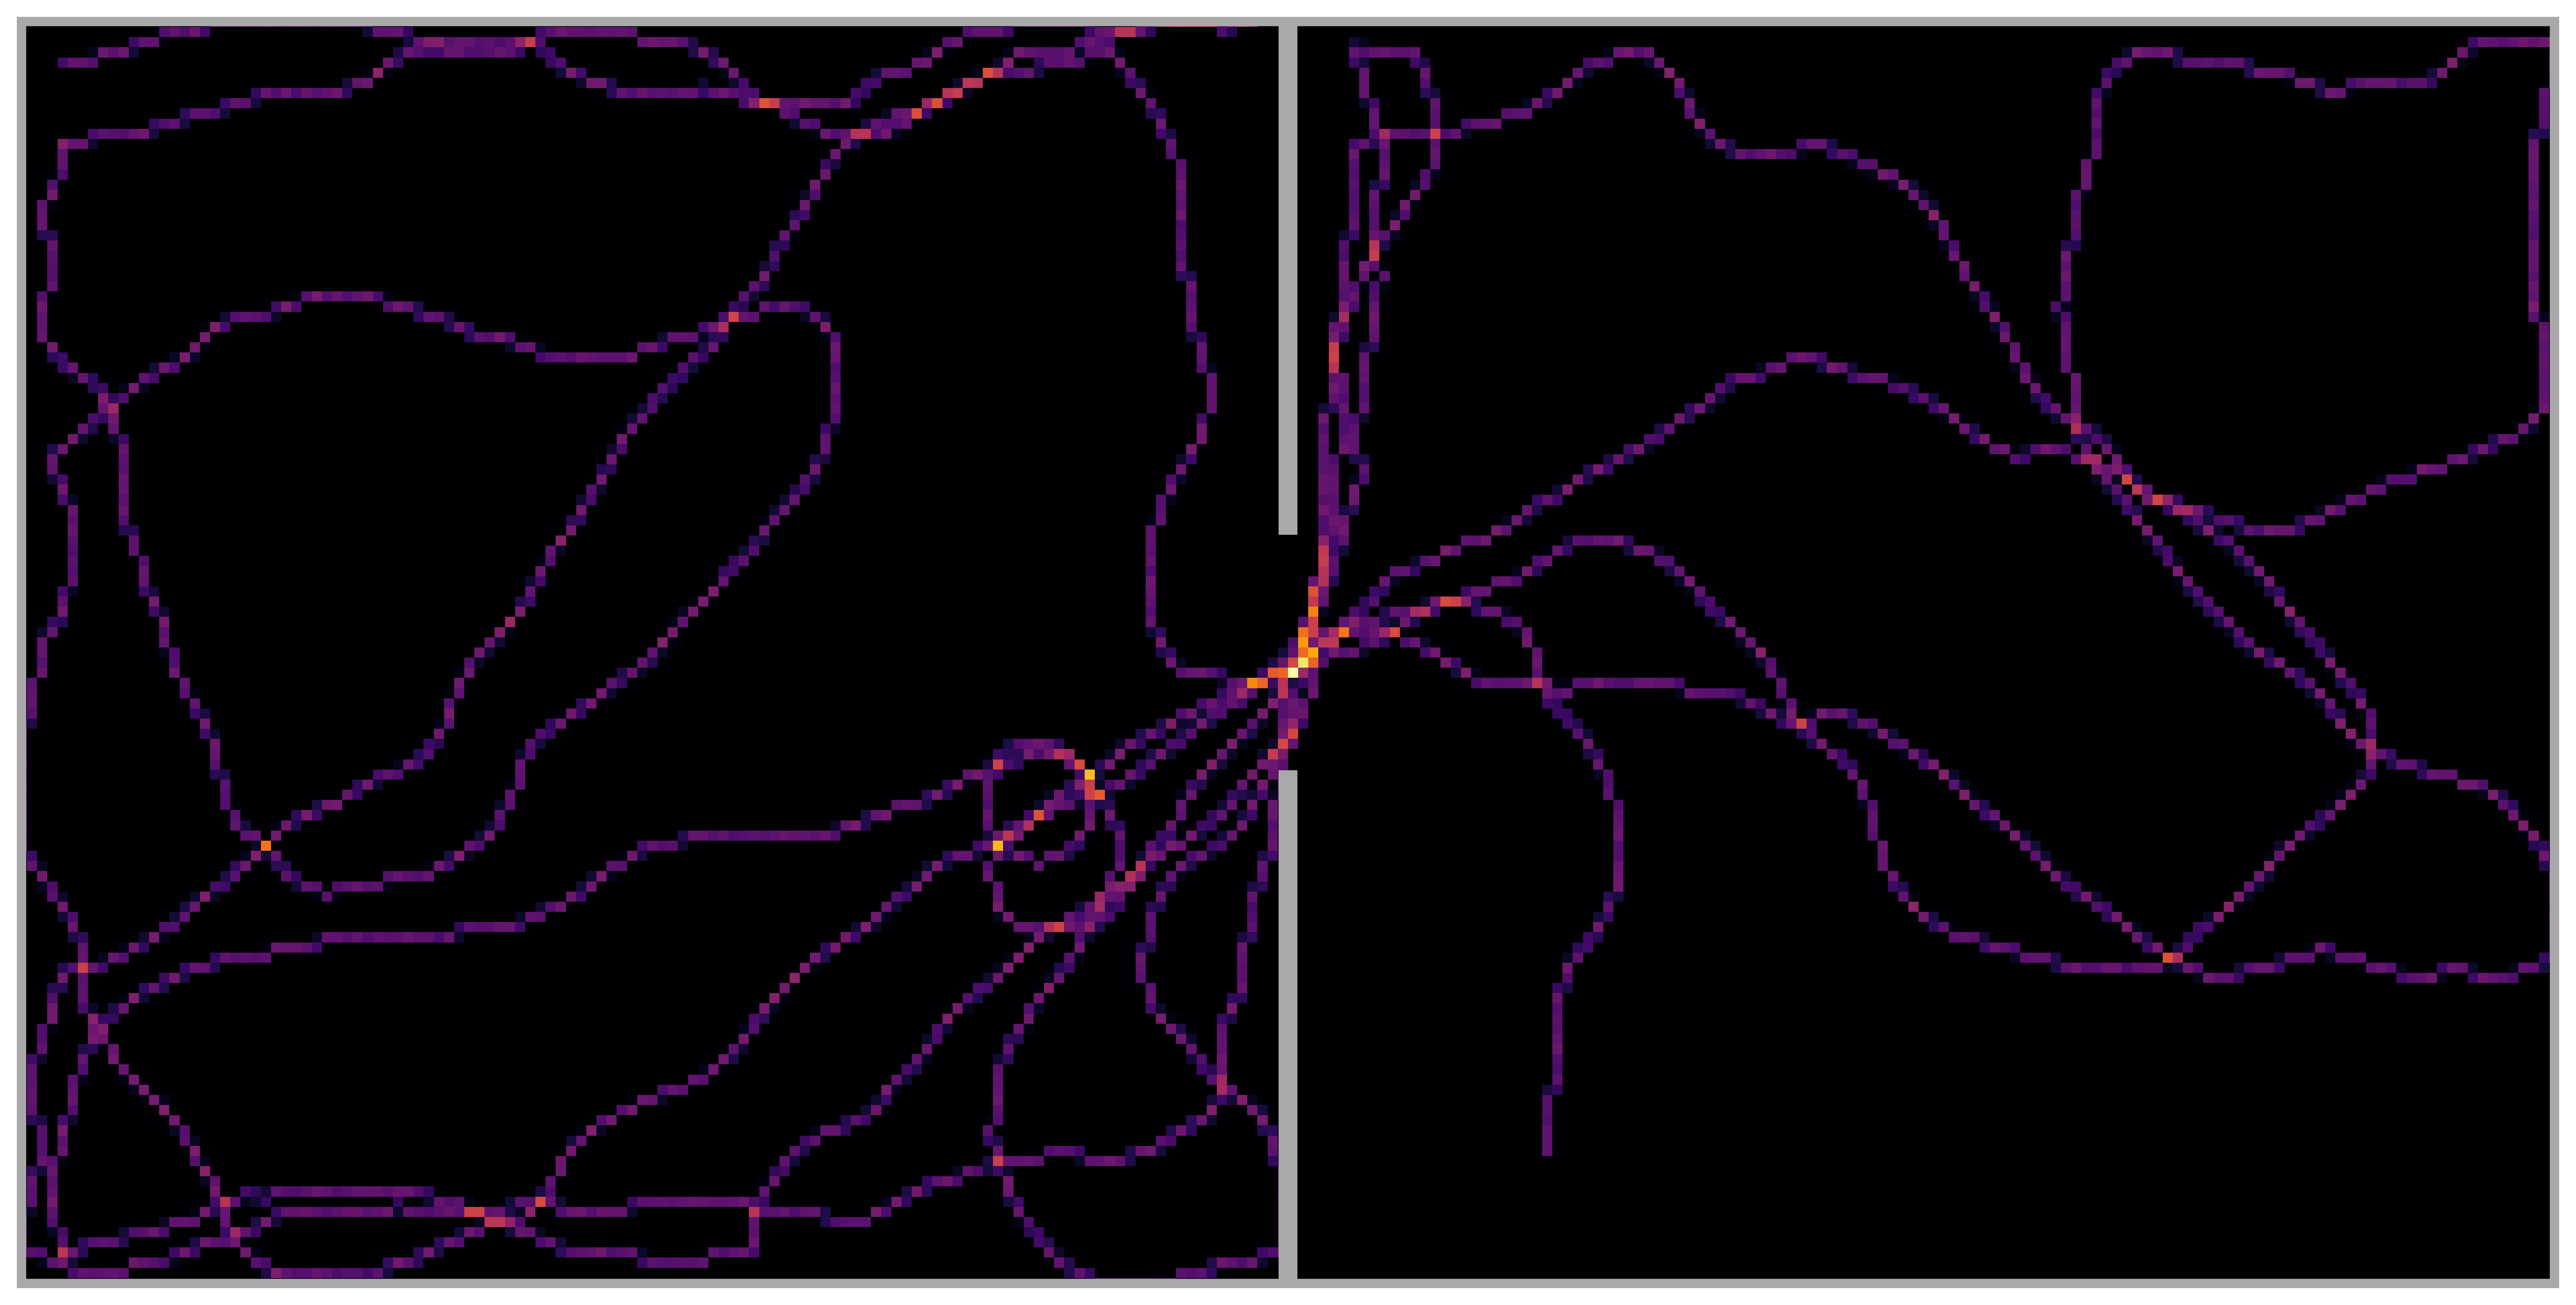

In [26]:
#FIGURE 2K
plotter3 = Visualiser(agent3)
fig, ax = plotter3.plotFeatureCells(centresOnly=True, textlabel=False)
# fig, ax  = plotter3.plotTrajectory(fig=fig, ax=ax, starttime=0, endtime=10)
saveFigure(fig, 'twoRoom',specialLocation="../figures/paperFigures/figure2/2K.svg")

#FIGURE 2L
fig, ax = plotter3.plotM(whichM='W',colorbar=False,time=60)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure2/2L.svg')

#FIGURE 2M
fig, ax, cb, cax = plotter3.plotM()
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C0')
    spine.set_linewidth(2)
cb.set_ticks([0])
cb.set_ticklabels([""])
cax.tick_params(color='darkgrey',width=2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'M',specialLocation='../figures/paperFigures/figure2/2M.svg')

fig, ax = plotter3.plotVarianceAndError()
saveFigure(fig,'Mvarerr',specialLocation='../figures/paperFigures/figure2/2N.svg')

plotter3.plotHeatMap()

print(R2(agent3.M,agent3.W))

In [28]:
import time 

overwrite = True

if overwrite == True:
    for i in range(10):
        print("WARNING! Overwriting in %g s" %(10-i)) 
        time.sleep(1) 
    pickleAndSave(agent,"openLoop")
    pickleAndSave(agent2,"closedLoop")
    # pickleAndSave(agent3,"twoRooms")

WARNING! Overwriting in 10 s
WARNING! Overwriting in 9 s
WARNING! Overwriting in 8 s
WARNING! Overwriting in 7 s
WARNING! Overwriting in 6 s
WARNING! Overwriting in 5 s
WARNING! Overwriting in 4 s
WARNING! Overwriting in 3 s
WARNING! Overwriting in 2 s
WARNING! Overwriting in 1 s


In [ ]:
if overwrite == True:
    agent = loadAndDepickle("openLoop")
    agent2 = loadAndDepickle("closedLoop")
    agent3 = loadAndDepickle("twoRooms")

In [32]:
a = (1,2)
b = np.array([[[1,1],[2,2],[3,3]],[[4,4],[5,5],[6,6]],[[7,7],[8,8],[9,9]]])
b[a]


array([6, 6])

Receptive field (mean, std, skew) = (3.05, 0.434, -0.0)
(20, 500)
[2.595 0.105]
Place field     (mean, std, skew) = (2.596, 0.56, -0.16)


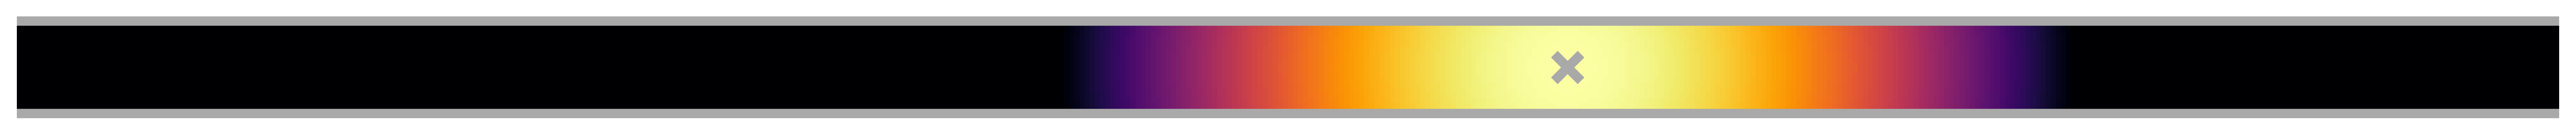

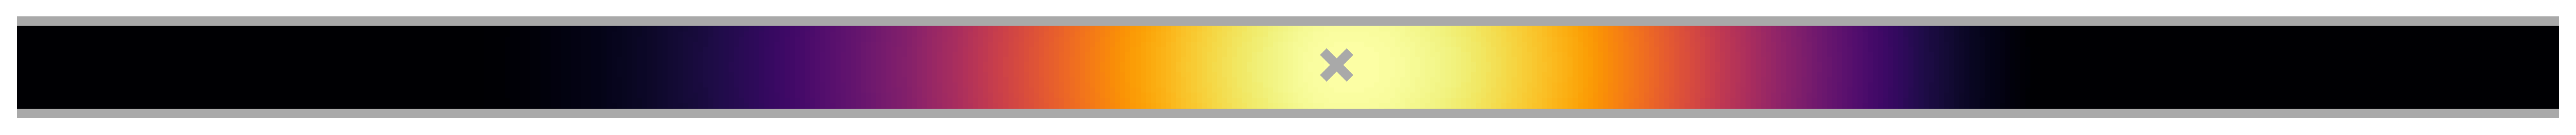

In [41]:
#FIGURE 3A
plotter = Visualiser(agent)
N = 30
plotTime = 10 
W = agent.snapshots.iloc[agent.snapshots['t'].sub(plotTime*60).abs().to_numpy().argmin()]['W']

x = agent.discreteCoords[10,:,0]
rf = agent.discreteStates[...,N]
pf = agent.getPlaceFields(W,threshold=0)[N]
coords = agent.discreteCoords


fig, ax = plotter.plotReceptiveField(number=N)
ax.scatter(agent.centres[N][0],agent.centres[N][1],marker='x',s=130,color='darkgrey',linewidth=4,edgecolors='darkgrey',alpha=1)
saveFigure(fig,'openLoopStart',specialLocation="../figures/paperFigures/figure3/3Ai.svg")
print("Receptive field (mean, std, skew) =",meanStdSkew(x,rf[10,:]))
fig, ax = plotter.plotPlaceField(time=10, number=N, STDP=True,threshold=0)
com = getCOM(pf)
com_coords = coords[com]
ax.scatter(com_coords[0],com_coords[1],marker='x',s=130,color='darkgrey',linewidth=4,edgecolors='darkgrey',alpha=1)
saveFigure(fig,'openLoopEnd',specialLocation="../figures/paperFigures/figure3/3Aii.svg")
print("Place field     (mean, std, skew) =",meanStdSkew(x,pf[10,:]))



Receptive field (mean, std, skew) = (3.05, 0.434, -0.0)
(20, 500)
Place field     (mean, std, skew) = (2.98, 0.659, -0.068)


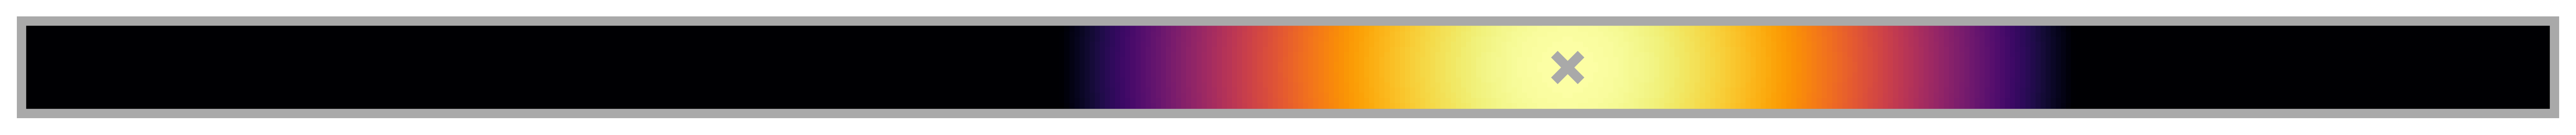

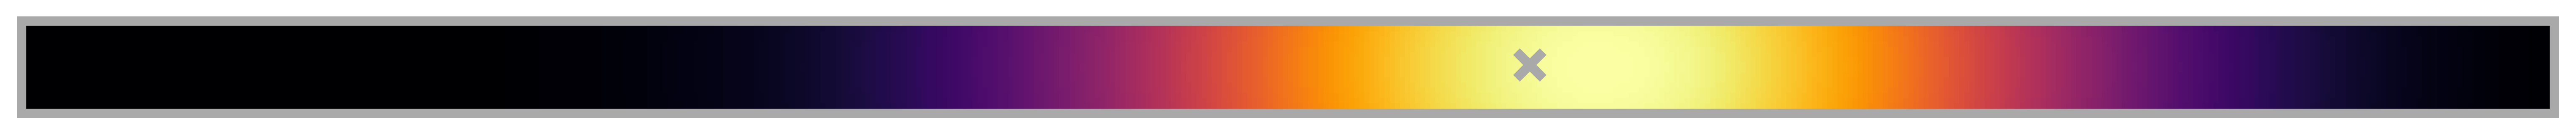

In [43]:
#FIGURE 3B
plotter2 = Visualiser(agent2)
N = 30
plotTime = 10 
W = agent2.snapshots.iloc[agent2.snapshots['t'].sub(plotTime*60).abs().to_numpy().argmin()]['W']

x = agent2.discreteCoords[10,:,0]
rf = agent2.discreteStates[...,N]
pf = agent2.getPlaceFields(W,threshold=0)[N]
coords = agent2.discreteCoords


fig, ax = plotter2.plotReceptiveField(number=N)
ax.scatter(agent2.centres[N][0],agent2.centres[N][1],marker='x',s=130,color='darkgrey',linewidth=4,edgecolors='darkgrey',alpha=1)
saveFigure(fig,'closedLoopStart',specialLocation="../figures/paperFigures/figure3/3Bi.svg")
print("Receptive field (mean, std, skew) =",meanStdSkew(x,rf[10,:]))

fig, ax = plotter2.plotPlaceField(time=30, number=N, STDP=True,threshold=0)
com = getCOM(pf)
com_coords = coords[com]
ax.scatter(com_coords[0],com_coords[1],marker='x',s=130,color='darkgrey',linewidth=4,edgecolors='darkgrey',alpha=1)
saveFigure(fig,'closedLoopEnd',specialLocation="../figures/paperFigures/figure3/3Bii.svg")
print("Place field     (mean, std, skew) =",meanStdSkew(x,pf[10,:]))


Eccentricity = 0.146
Eccentricity = 0.562
(125, 250)


'../figures/211007/2DMazeSideEnd_1659'

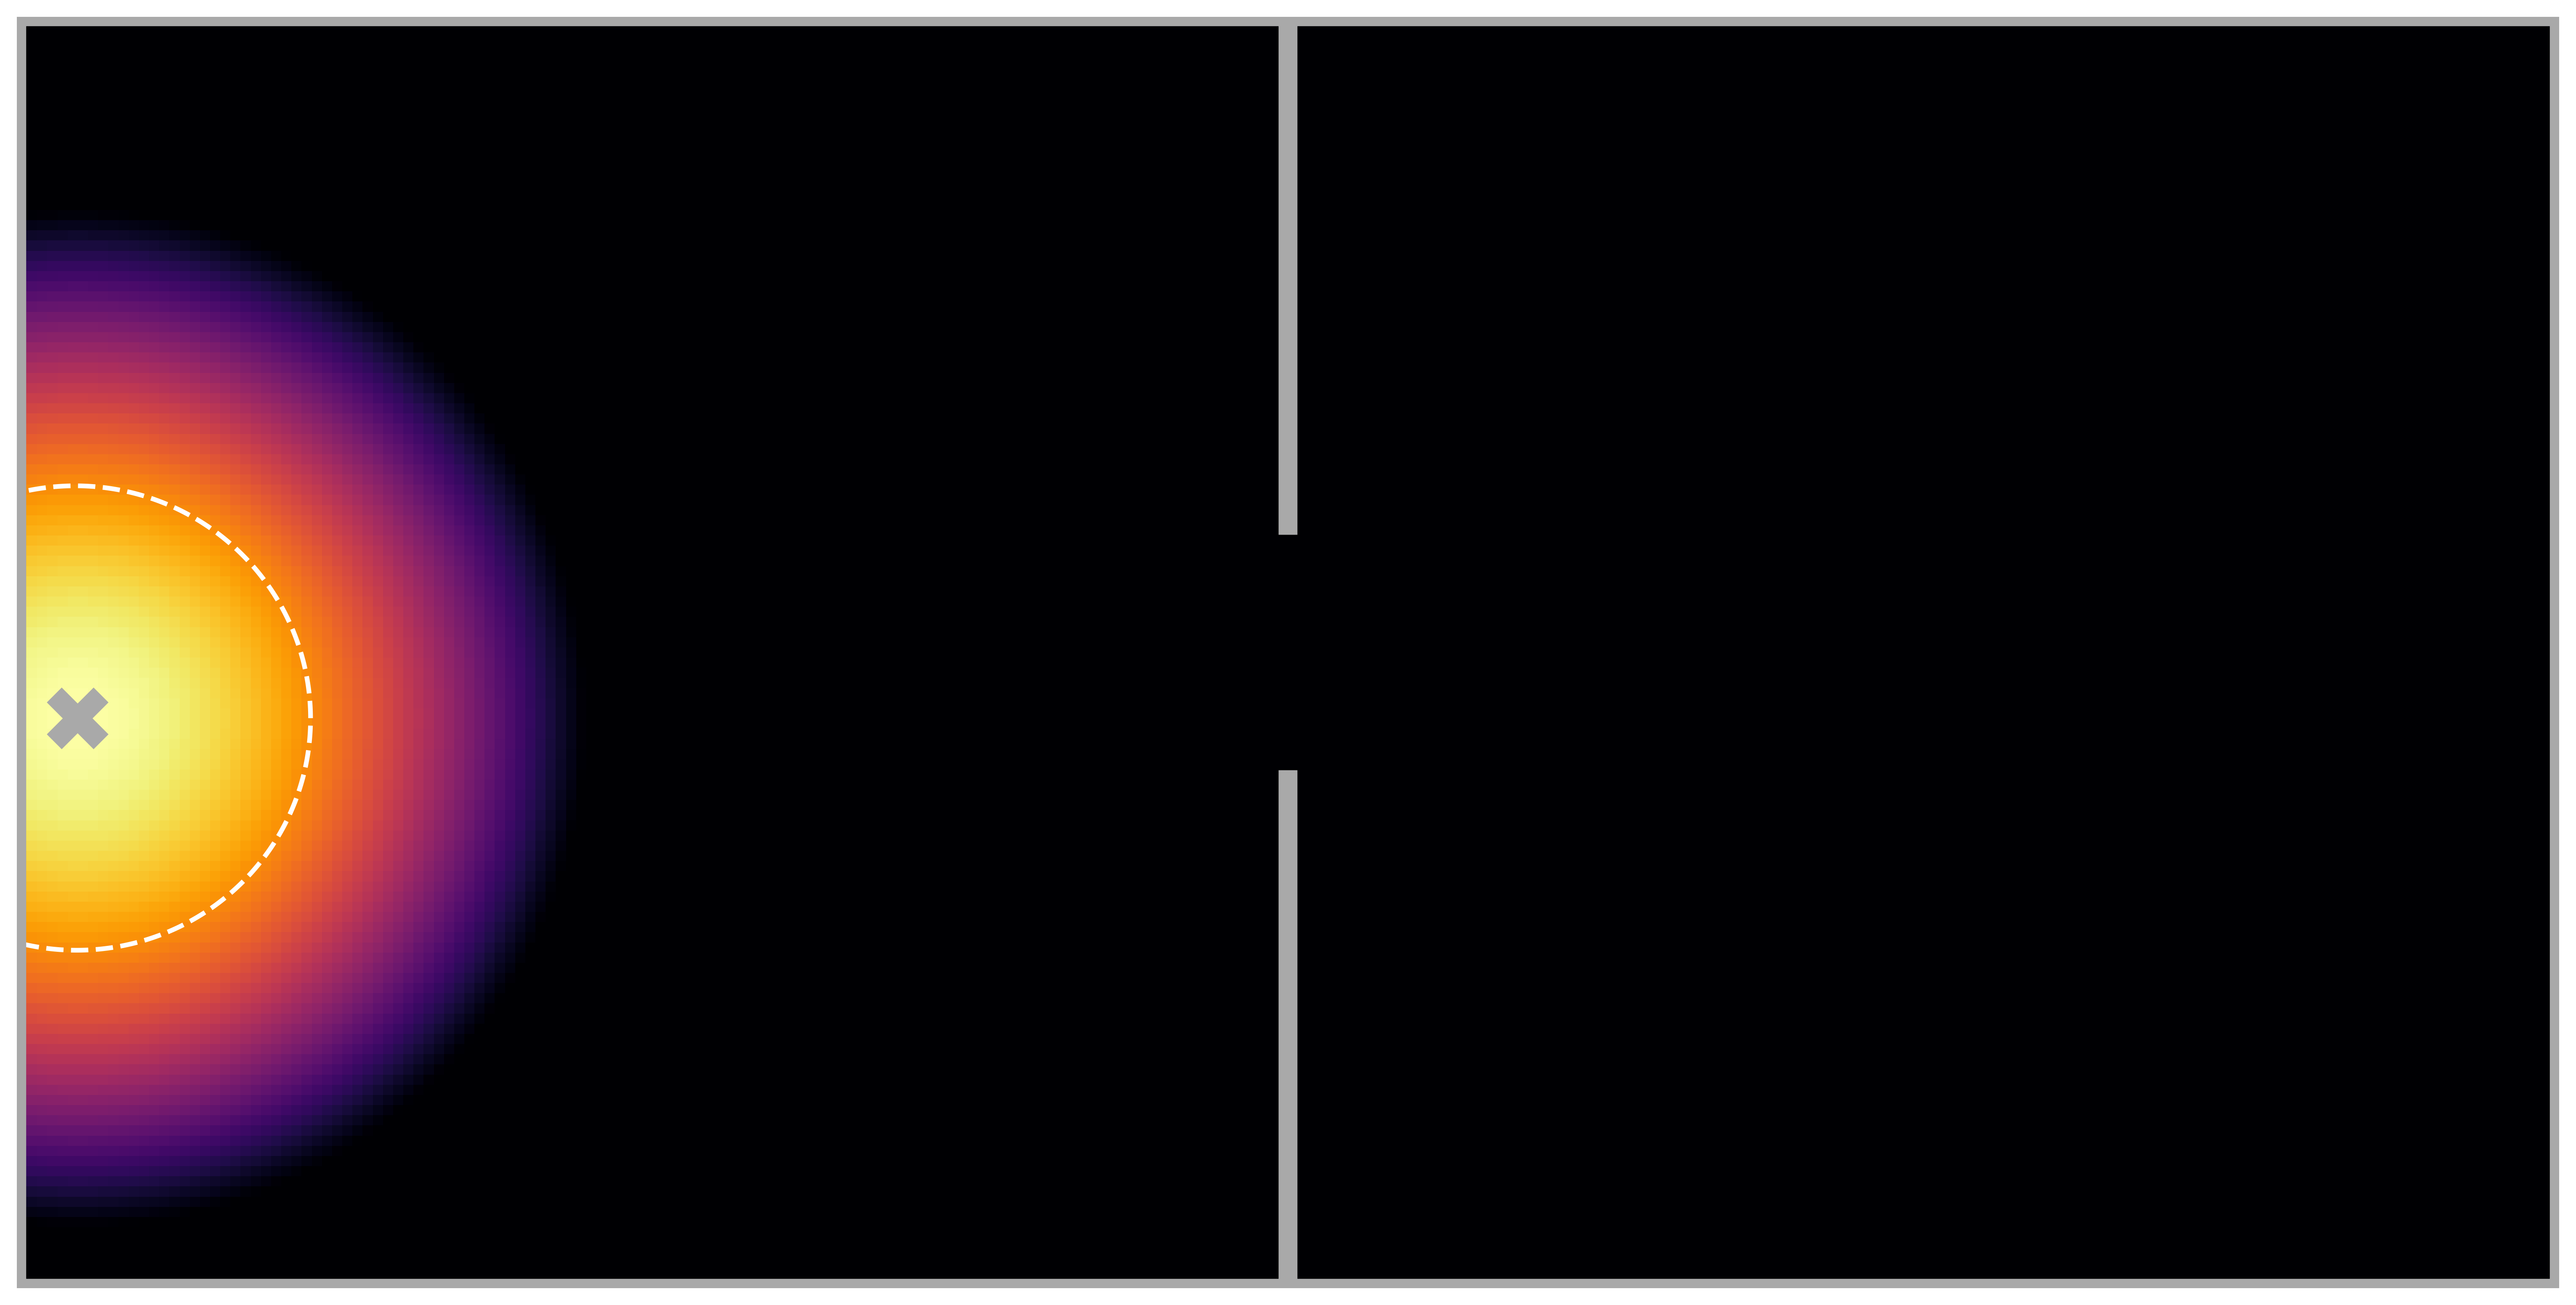

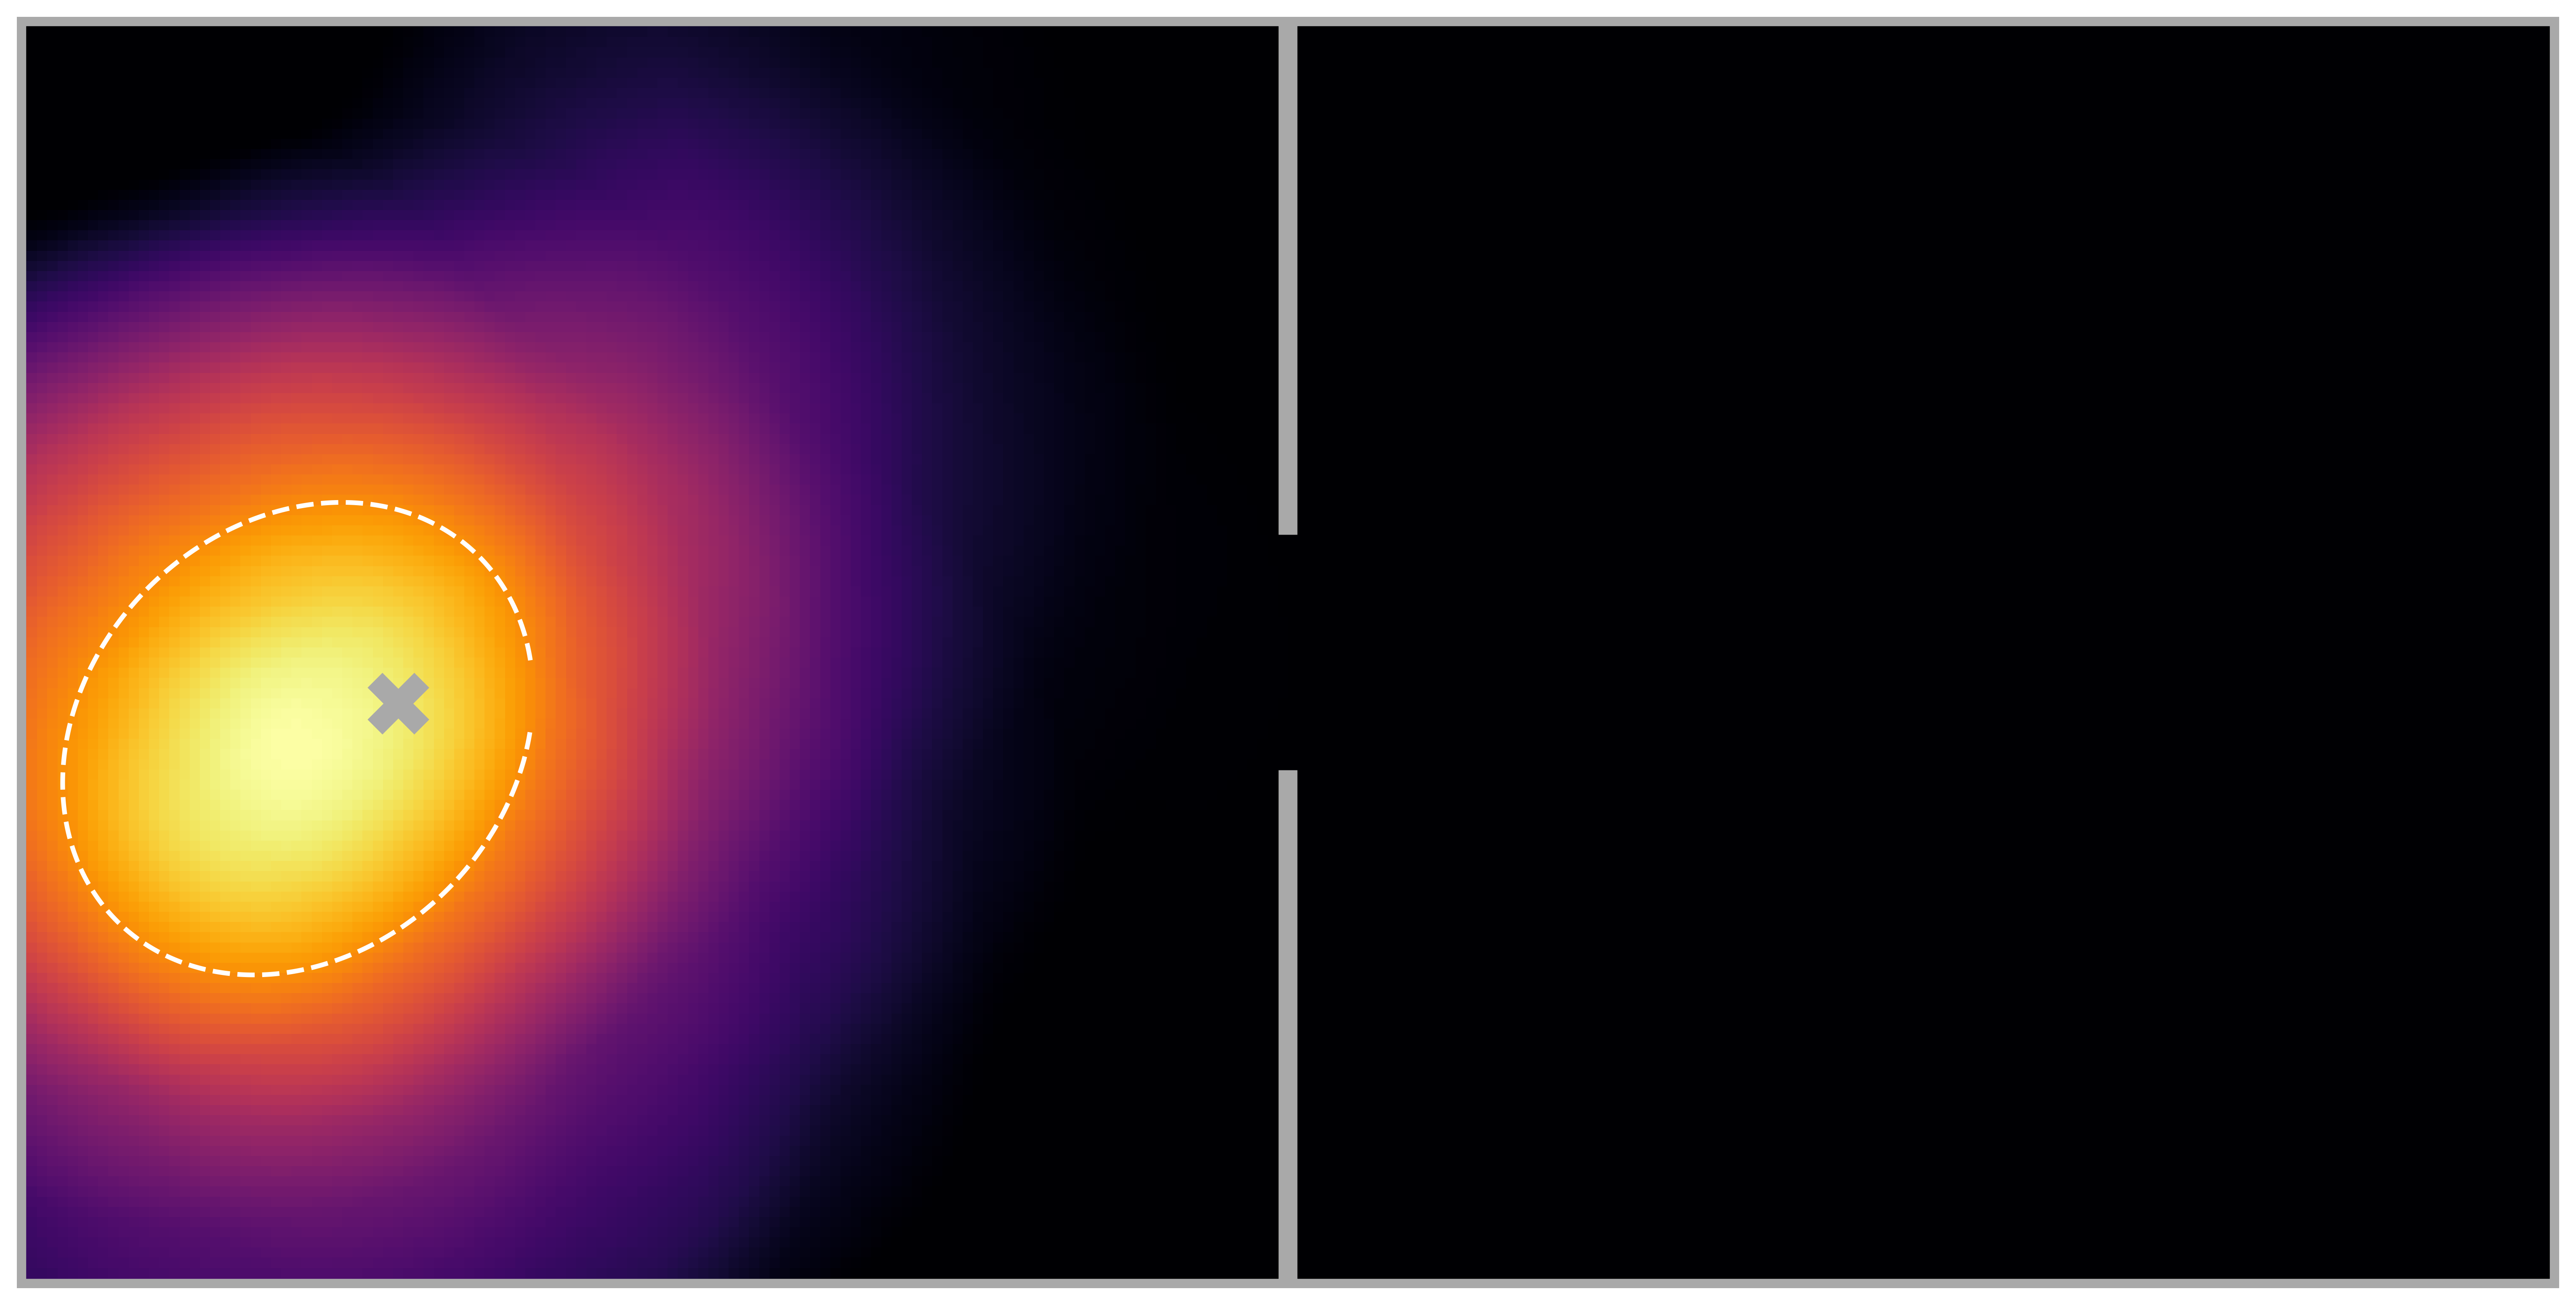

In [56]:
#FIGURE 3C
plotter3 = Visualiser(agent3)
#find cell near wall
plotTIme = 30 
cellID = np.argmin(np.linalg.norm(agent3.centres - np.array([0.15,1]),axis=1))
# W = agent3.snapshots.iloc[agent3.snapshots['t'].sub(plotTime*60).abs().to_numpy().argmin()]['W']

x = agent3.discreteCoords[10,:,0]
rf = agent3.discreteStates[...,cellID]
pf = agent3.getPlaceFields(W,threshold=0)[cellID]
coords = agent3.discreteCoords


fig, ax = plotter3.plotReceptiveField(number=cellID, fitEllipse_=True)
ax.scatter(agent3.centres[cellID][0],agent3.centres[cellID][1],marker='x',s=400,color='darkgrey',linewidth=9,edgecolors='darkgrey',alpha=1)
saveFigure(fig,'2DMazeSideStart',specialLocation="../figures/paperFigures/figure3/3Ci.svg")

fig, ax = plotter3.plotPlaceField(number=cellID, STDP=True,fitEllipse_=True,threshold=0)
com = getCOM(pf)
com_coords = coords[com]
ax.scatter(com_coords[0],com_coords[1],marker='x',s=400,color='darkgrey',linewidth=9,edgecolors='darkgrey',alpha=1)
saveFigure(fig,'2DMazeSideEnd',specialLocation="../figures/paperFigures/figure3/3Cii.svg")

'../figures/211006/2DMazeDoorCreepEnd_1545'

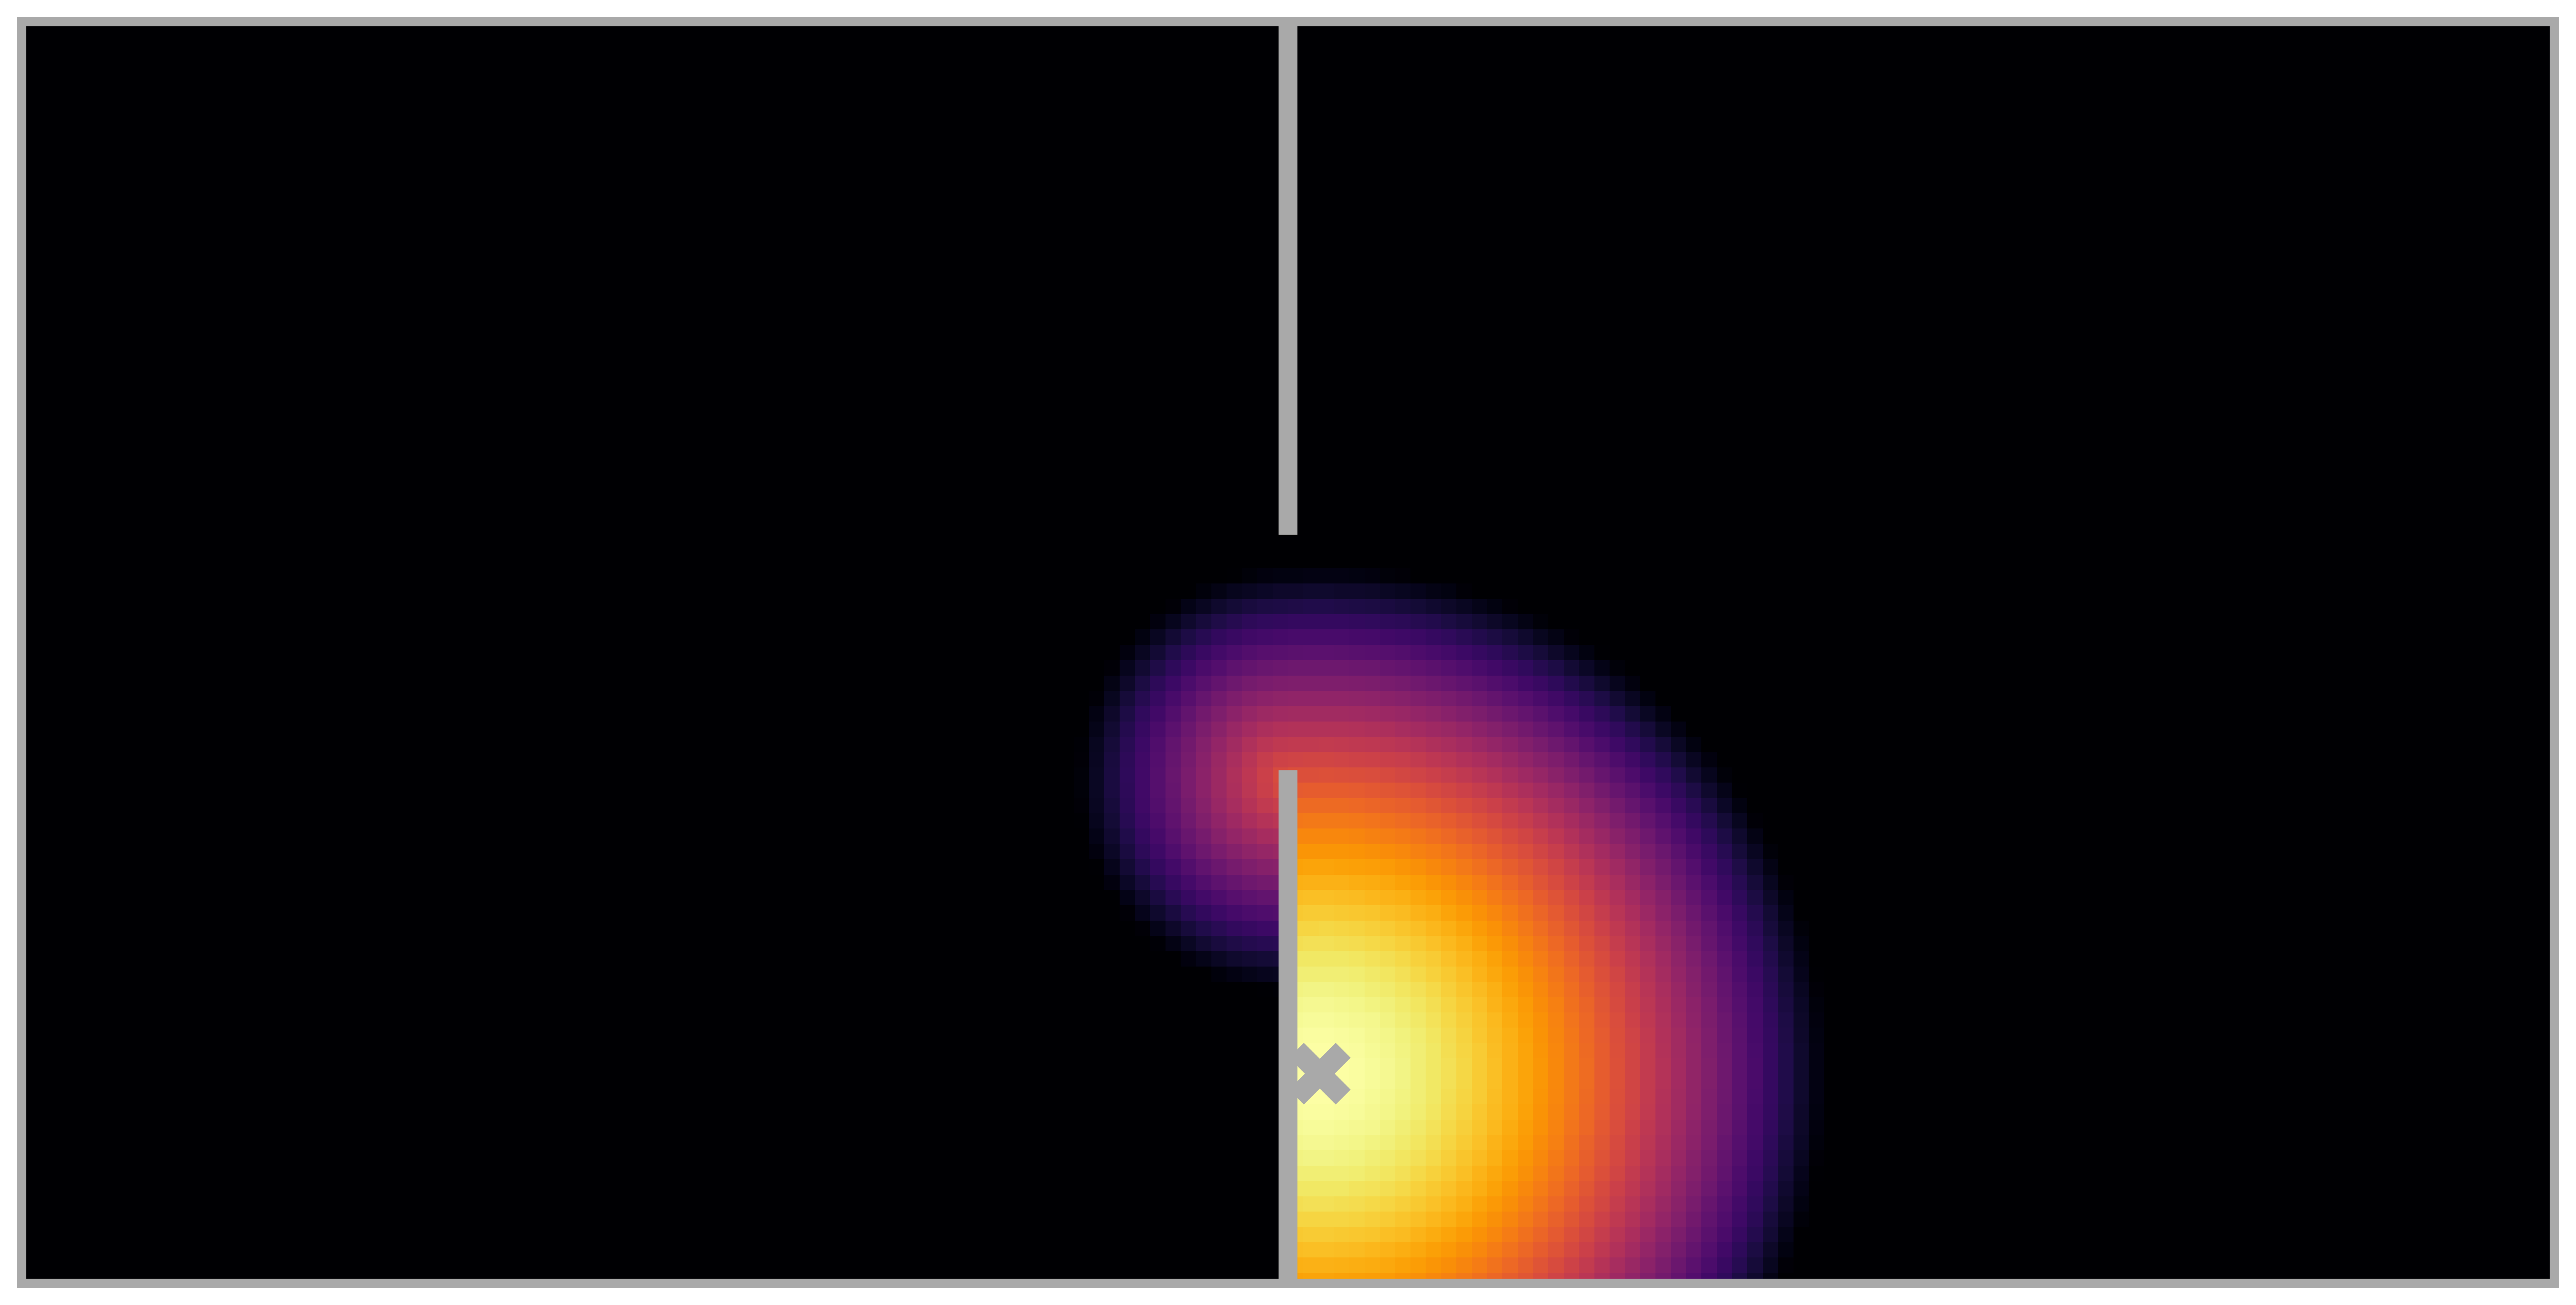

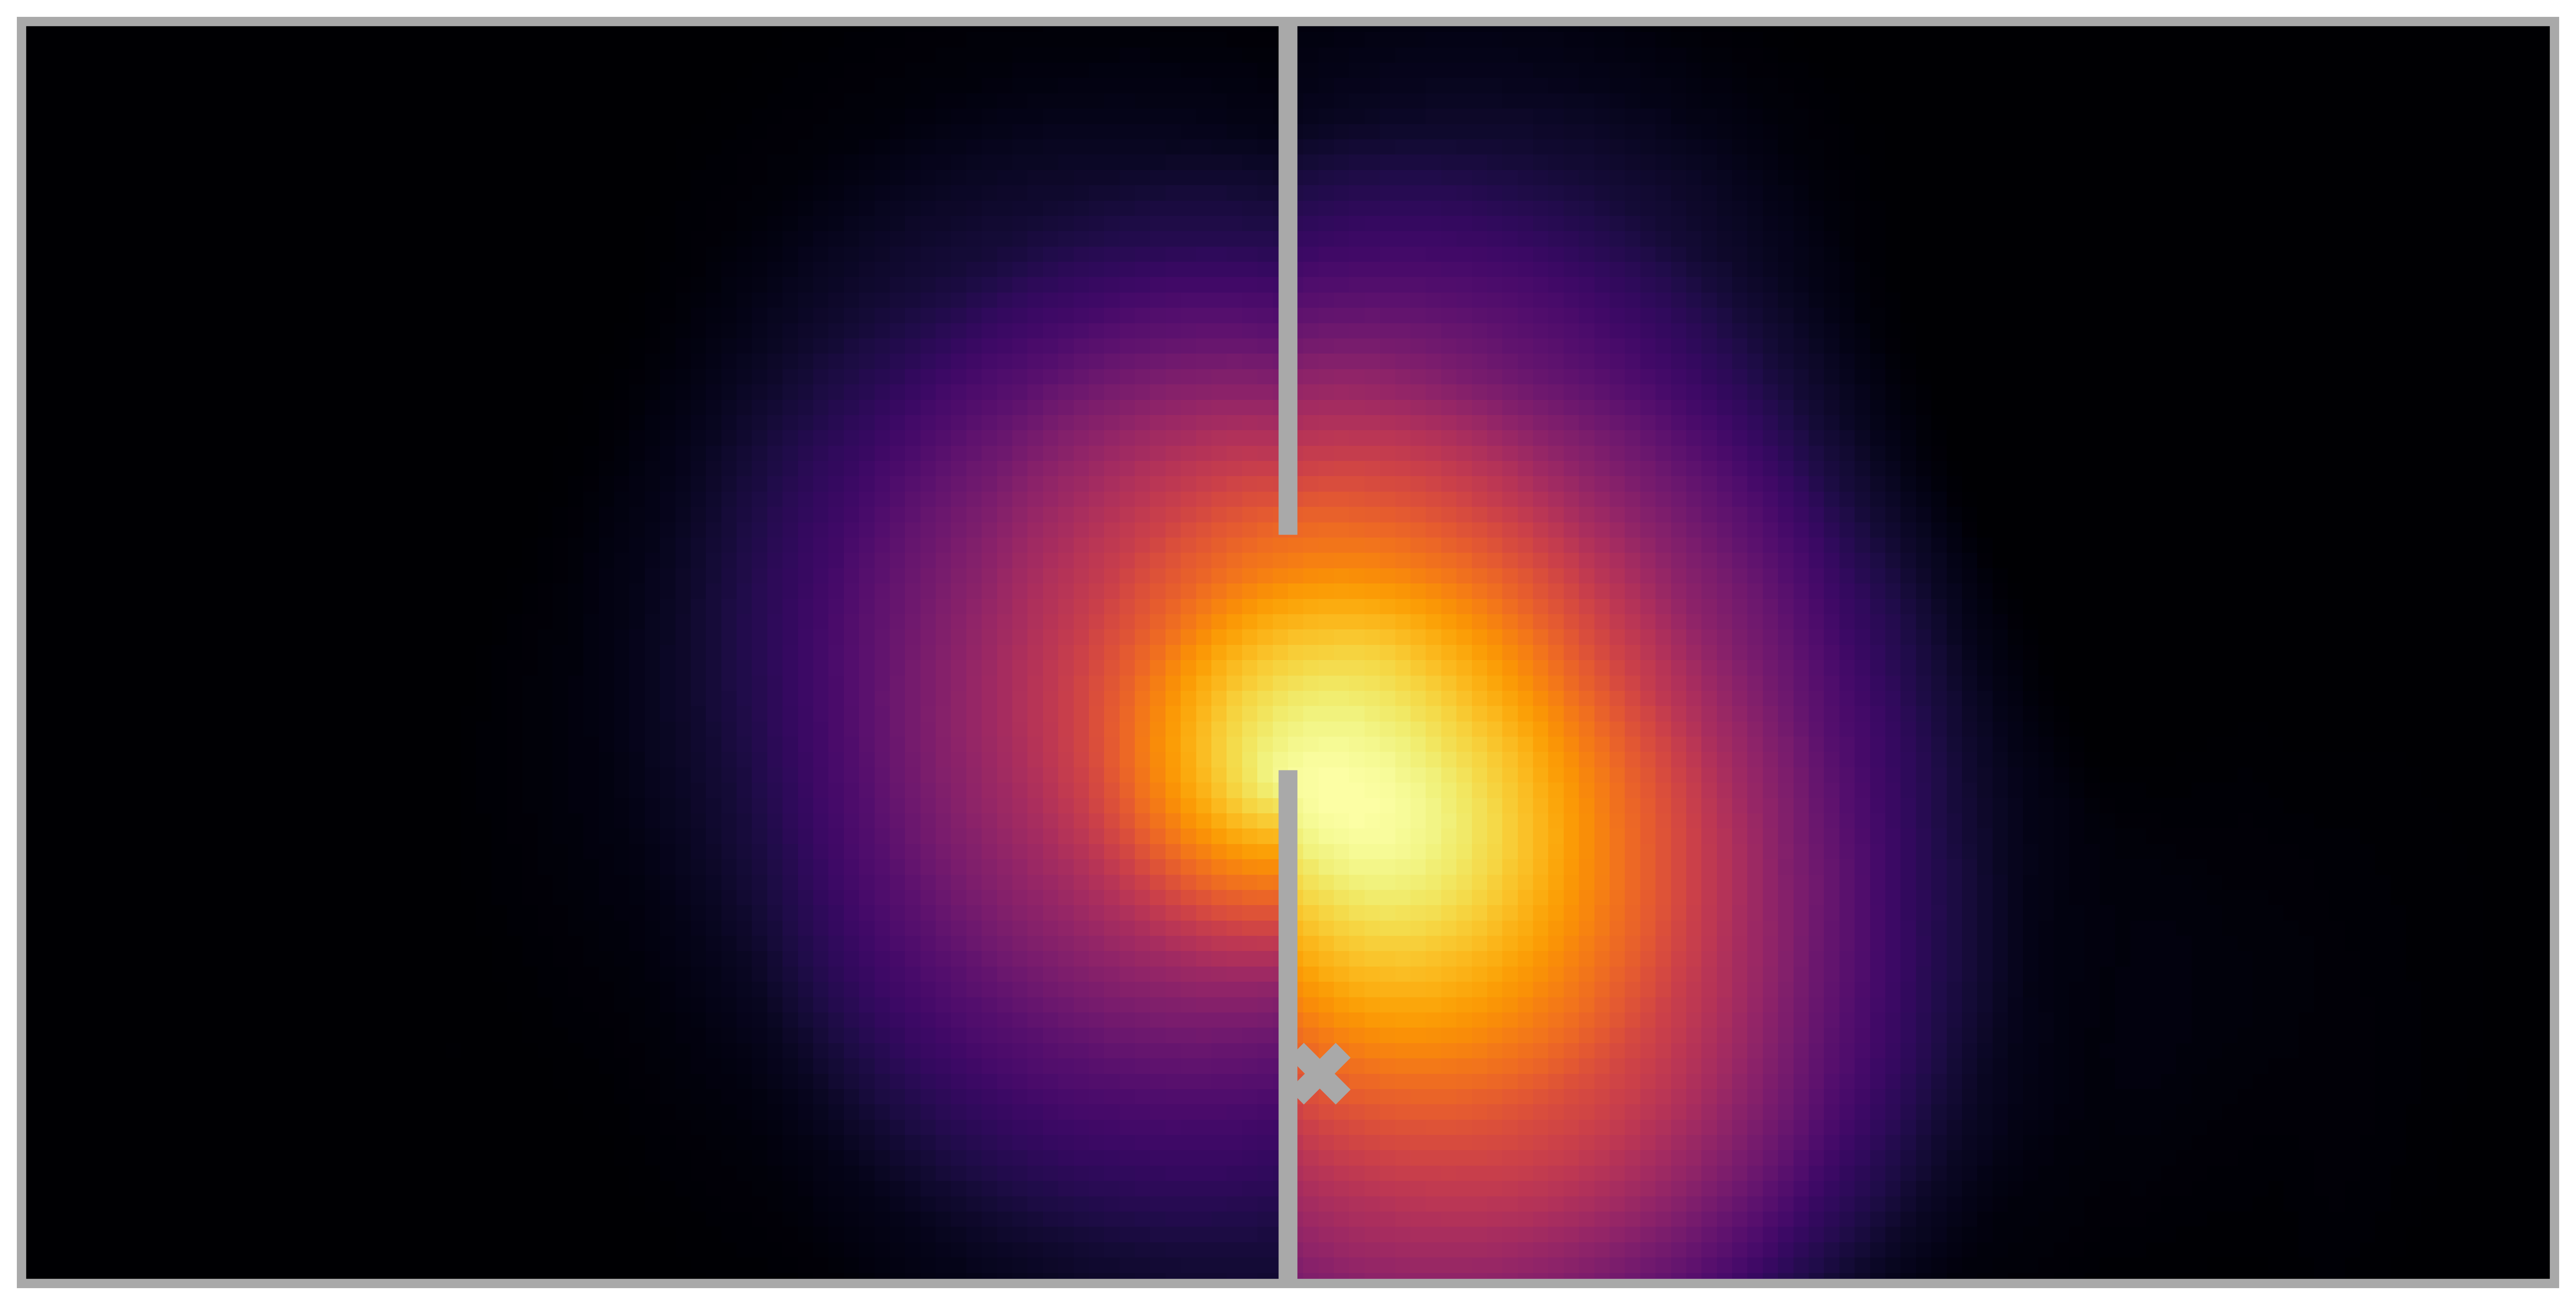

In [267]:
#FIGURE 3D
plotter3 = Visualiser(agent3)
#find cell just behind wall
cellID = np.argmin(np.linalg.norm(agent3.centres - np.array([2.6,0.5]),axis=1))
fig, ax = plotter3.plotReceptiveField(number=cellID)
ax.scatter(agent3.centres[cellID][0],agent3.centres[cellID][1],marker='x',s=400,color='darkgrey',linewidth=9,edgecolors='darkgrey',alpha=1)
saveFigure(fig,'2DMazeDoorCreepStart',specialLocation="../figures/paperFigures/figure3/3Di.svg")

fig, ax = plotter3.plotPlaceField(time=30, number=cellID, STDP=True,threshold=0)
ax.scatter(agent3.centres[cellID][0],agent3.centres[cellID][1],marker='x',s=400,color='darkgrey',linewidth=9,edgecolors='darkgrey',alpha=1)
saveFigure(fig,'2DMazeDoorCreepEnd',specialLocation="../figures/paperFigures/figure3/3Dii.svg")

In [ ]:
N=50
xcen = np.linspace(0,5,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T
centres = np.vstack((centres,centres,centres))
sigmas = np.array([0.5]*N  + [1]*N + [1.5]*N)

#Default parameters for MazeAgent 
params4 = { 

          #Maze params 
          'mazeType'            : 'loop',  #type of maze, define in getMaze() function
          'stateType'           : 'gaussianThreshold', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
          'movementPolicy'      : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'            : 5,          #maze size scaling parameter, metres
          'dt'                  : 0.002,       #simulation time disretisation 
          'centres'             : centres,       #array of receptive field positions. Overwrites nCells
          'sigma'               : sigmas,          #basis cell width scale (irrelevant for onehots)
          'doorsClosed'         : False,       #whether doors are opened or closed in multicompartment maze
          'reorderCells'        : False,
}


agent4 =  MazeAgent(params4)



Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions


  0%|          | 0/10000 [00:00<?, ?it/s]

   initialising STDP weight matrix and traces


'../figures/210827/openloop_threetypes_1336'

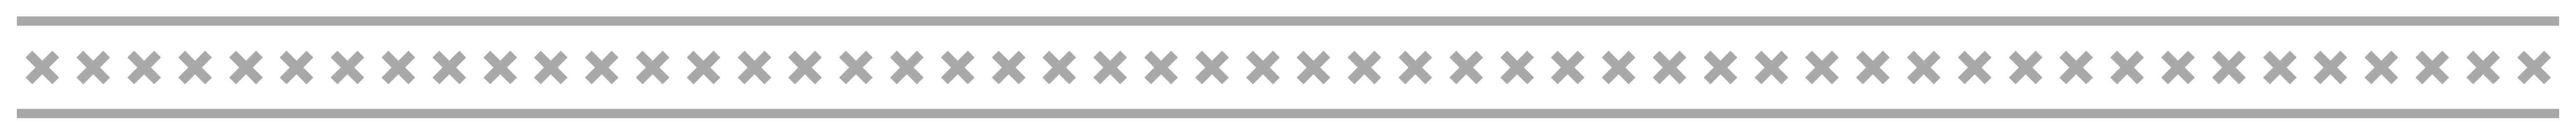

In [ ]:
#FIGURE 4A 
plotter4 = Visualiser(agent4)
fig, ax = plotter4.plotFeatureCells(centresOnly=True, textlabel=False,threetypes=False)
saveFigure(fig,'openloop_threetypes',specialLocation="../figures/paperFigures/figure4/4C.svg")

  0%|          | 0/150000 [00:00<?, ?it/s]

Calculating place and grid cells
using default threshold


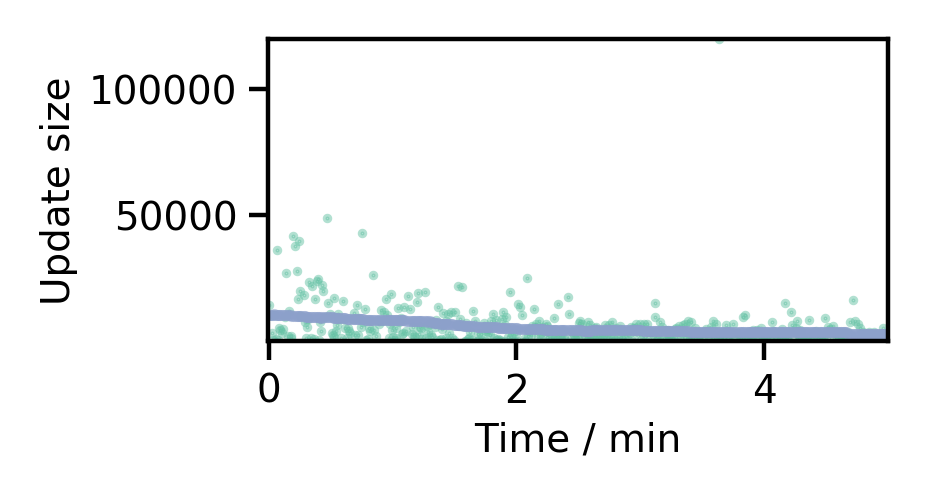

In [ ]:
agent4.runRat(trainTime=5,saveEvery=0.1)
plotter4 = Visualiser(agent4)

'../figures/210827/M_1339_2'

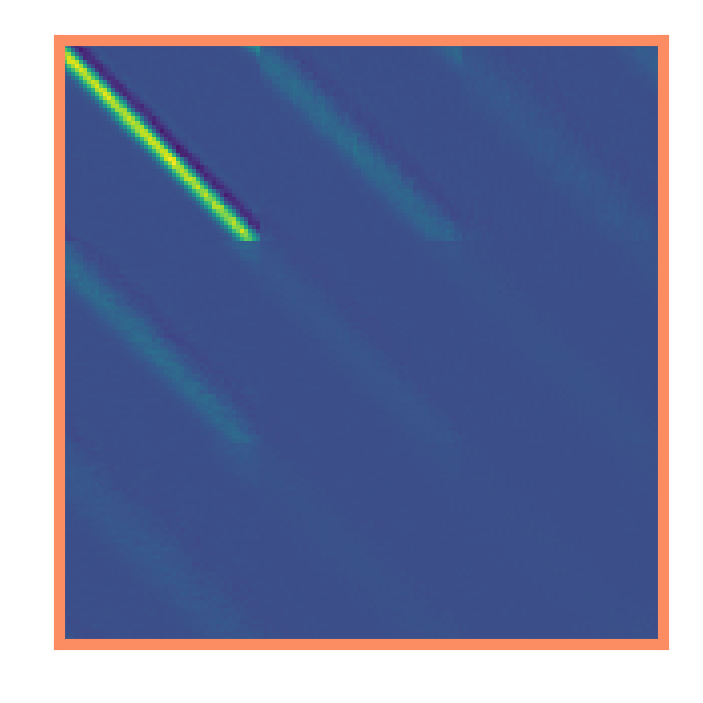

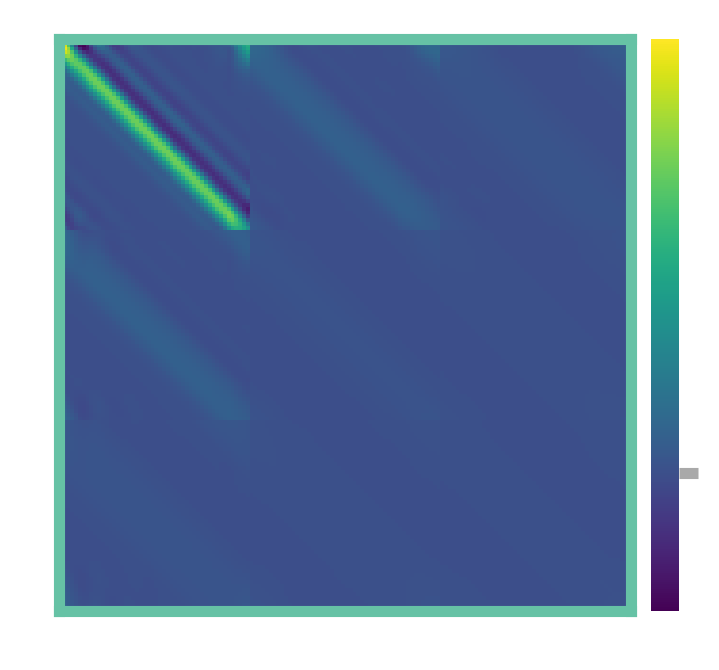

In [ ]:
#FIGURE 2L
fig, ax = plotter4.plotM(STDP=True,colorbar=False)
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C1')
    spine.set_linewidth(2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'W',specialLocation='../figures/paperFigures/figure4/4D.svg')

#FIGURE 2M
fig, ax, cb, cax = plotter4.plotM()
ax.axis('on')
for spine in ax.spines.values():
    spine.set_color('C0')
    spine.set_linewidth(2)
cb.set_ticks([0])
cb.set_ticklabels([""])
cax.tick_params(color='darkgrey',width=2)
ax.set_xticks([])
ax.set_yticks([])
saveFigure(fig,'M',specialLocation='../figures/paperFigures/figure4/4E.svg')

In [ ]:
#FIGURE 4A
N=50
loopsize=5
xcen = np.linspace(0,loopsize,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T

sigmas = [0.25,0.5,0.75,1,1.25,1.5,1.75,2]
w_bank = np.zeros(shape=(len(sigmas),N,N))

for (i, sigma) in enumerate(sigmas):
    parameters = {
            #Maze params 
            'mazeType'            : 'loop',  #type of maze, define in getMaze() function
            'stateType'           : 'bump', #feature on which to TD learn (onehot, gaussian, gaussianCS, circles, bump)
            'movementPolicy'      : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
            'roomSize'            : loopsize,          #maze size scaling parameter, metres
            'dt'                  : 0.005,       #simulation time disretisation 
            'centres'             : centres,       #array of receptive field positions. Overwrites nCells
            'sigma'               : sigma,          #basis cell width scale (irrelevant for onehots)
            'doorsClosed'         : False,       #whether doors are opened or closed in multicompartment maze
            #TD params 
            'tau'                 : 3,          #TD decay time, seconds
            'TDdx'                : 0.01,       #rough distance between TD learning updates, metres 
            'alpha'               : 0.01,       #TD learning rate 
            'successorFeatureNorm': 100,        #linear scaling on successor feature definition found to improve learning stability
            #STDP params
            'a_pre'               : 1,          #bump in cell 'presynaptic trace' when it spikes
            'a_post'              : 0.7,      #bump in cell 'postsynaptic trace' when it spikes
            'precessFraction'     : 1,        #fraction of 2pi the prefered phase moves through
            'peakFiringRate'      : 20,         #peak firing rate of a cell (middle of place field, preferred theta phase)
            'eta_pre'             : 0.05,        #learning rate for pre to post strengthening 
            'eta_post'            : 0.05,        #learning rate for post to pre weakening
            'kappa'               : 1,        #von mises spread parameter (smaller = wider)
            'tau_pre'             : 20e-3,      #rate potentiating trace decays
            'tau_post'            : 20e-3,      #rate depressing trace decays 
            'baselineFiringRate'  : 0
    }

    agentsigma =  MazeAgent(parameters)
    agentsigma.runRat(trainTime=10,TDSRLearn=False)
    w_bank[i] = agentsigma.W


In [ ]:
taus = np.zeros(len(sigmas))
taus_sigma = np.zeros(len(sigmas))

for (i,sigma) in enumerate(sigmas):
    t = []
    w_shifted = np.zeros_like(agentsigma.W)
    w = w_bank[i]
    for j in range(agentsigma.nCells):
        w_shifted[j,:] = np.roll(w[j,:],-j)
    w_shifted_mean = np.mean(w_shifted,axis=0)
    b = np.argmax(w_shifted_mean)
    plt.plot(w_shifted_mean)
    max_binding = w_shifted_mean[b]
    while True: 
        if w_shifted_mean[b] <= max_binding / np.e:
            t = agentsigma.nCells - b
            break
        else: 
            b -= 1 
    tau =  t * (agentsigma.roomSize / agentsigma.nCells) / (agentsigma.speedScale)
    taus[i] = tau

taus_plot = taus
taus_sigma_plot = taus_sigma
sigmas_plot = sigmas



fig, ax = plt.subplots(figsize=(2,2))
[m,c] = np.polyfit(sigmas_plot,taus_plot,deg=1)
x = np.linspace(0,sigmas_plot[-1],100)
y = m*x + c
color = ['darkgrey'] * len(sigmas)
color[1],color[3],color[5] = 'C2','#B696C7','C3'
size = [25] * len(sigmas)
ax.scatter(sigmas_plot,taus_plot,s=size,c=color)
# ax.errorbar(sigmas_plot,taus_plot,taus_sigma_plot,ls="none",c=color)
ax.plot(x,y,c='darkgrey',linestyle='--',linewidth=1)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0,right=sigmas_plot[-1]+0.1)
ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('darkgrey')
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_color('none')        
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('darkgrey')
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_color('none')
ax.set_xticks([0,0.5,1,1.5,2])
ax.set_xticklabels(['','','','',''])
ax.set_yticks([0,2,4,6,8,10])
ax.set_yticklabels(['','','','',''])
ax.tick_params(width=2,color='darkgrey')

saveFigure(fig,"tausigma",specialLocation="../figures/paperFigures/figure4/4A.svg")


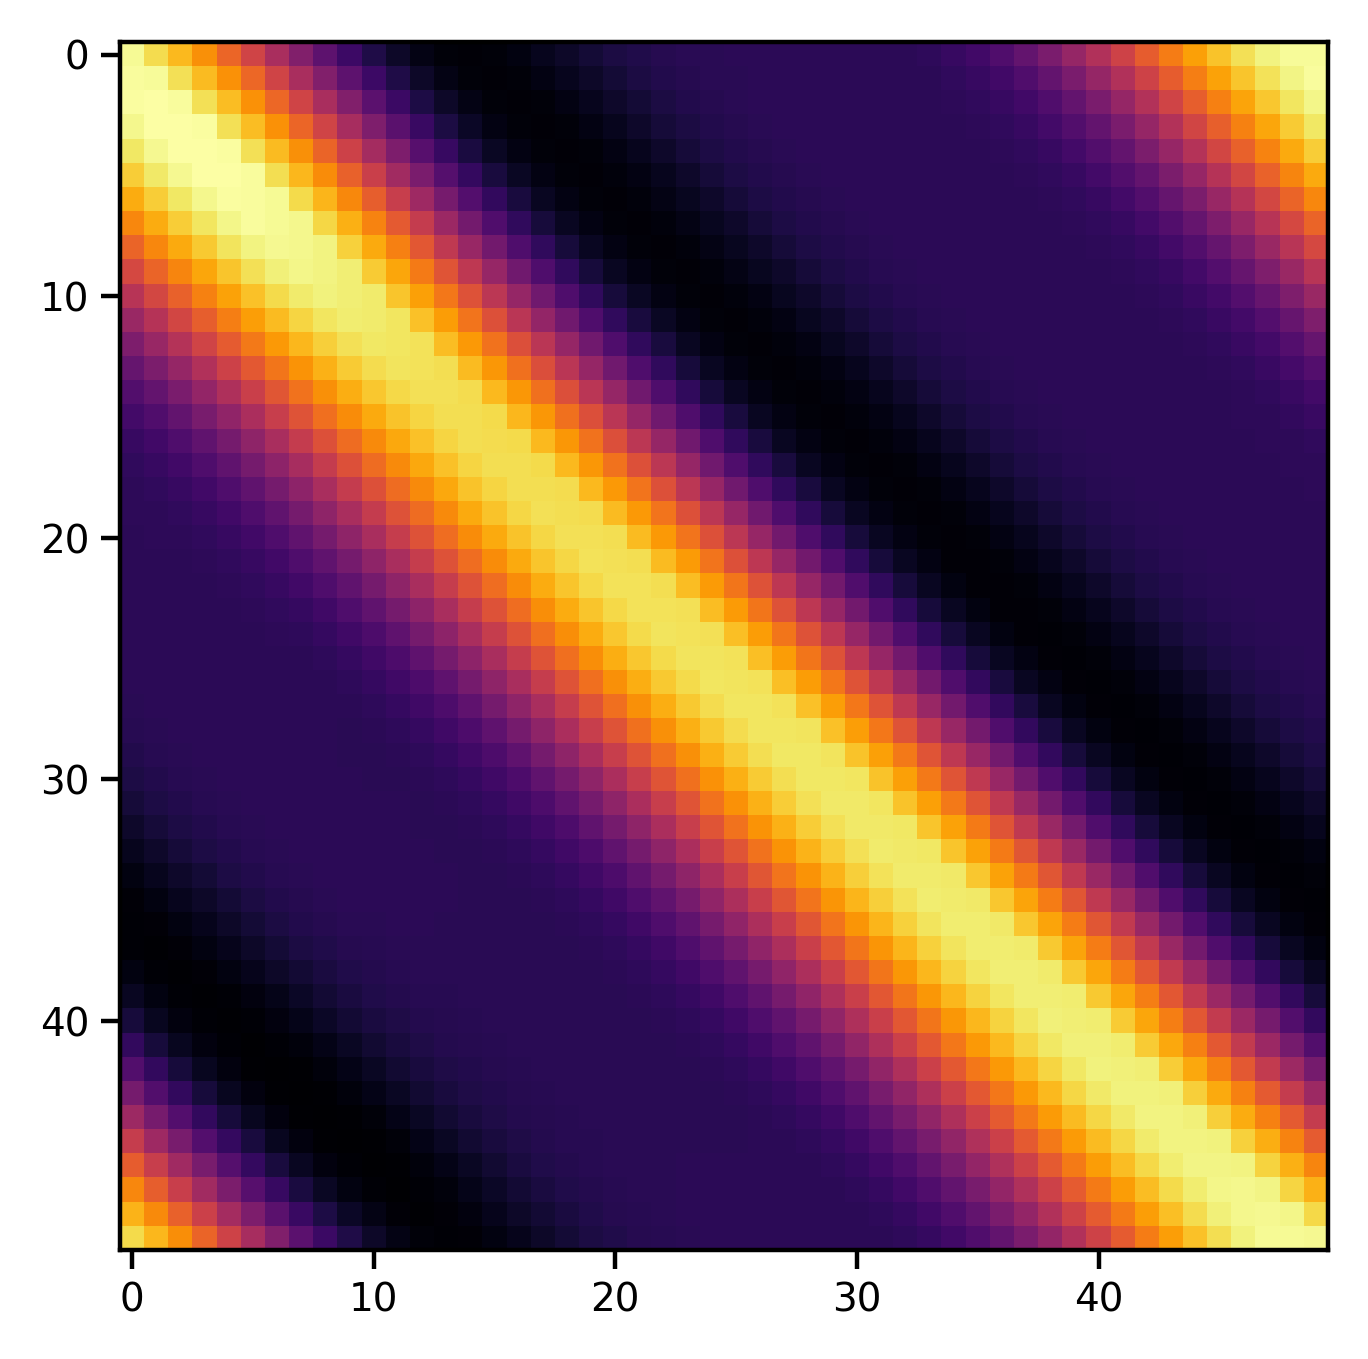

In [88]:
M_true = agent.M
plt.imshow(M_true)

In [98]:
agent.W_notheta

array([[ 4.98518852,  8.9433843 , -0.73438732, ...,  0.32844131,
        -0.89838564, 21.73654559],
       [-1.4701212 ,  4.31802037, 12.01531332, ...,  0.40045089,
         5.56757409,  8.67997461],
       [ 6.20736318, -2.80465058,  5.62173906, ...,  7.67121234,
         7.77808928,  0.08186741],
       ...,
       [ 6.82361027,  7.76877889, -2.09567335, ...,  3.49035258,
         0.60608232,  3.30637613],
       [ 4.95791411,  3.19118089, -0.69620463, ...,  9.93693302,
         0.76407347,  4.81981597],
       [-7.17615102,  0.0735595 ,  4.59682607, ...,  8.84418091,
         5.20797965,  2.52123231]])

(-2.308, 1.676, 0.549)


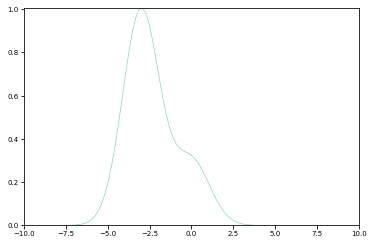

In [221]:
#skew
x = np.linspace(-10,10,100)
mu = 3
sigma = 1.1
y = np.exp(-(-x-mu)**2/(2*sigma**2)) + 0.3*np.exp(-(x)**2/(2*sigma**2))
plt.plot(x,y)

def functionMeanAndStd(X,Y):
    s_xy = 0
    s_y  = 0
    for (x,y) in zip(X,Y):
        s_xy += x*y
        s_y  += y 
    mean = s_xy/s_y

    s_var = 0
    for (x,y) in zip(X,Y):
        s_var += y*(x-mean)**2
    var = s_var/s_y
    std = var**0.5

    s_skew = 0 
    for (x,y) in zip(X,Y):
        s_skew += y*((x-mean)/std)**3
    skew = s_skew/s_y


    return round(mean,3), round(std,3), round(skew,3)

print(functionMeanAndStd(x,y))

In [249]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])